<h1>Project for ML in Economics</h1>

<h3>Team: Anasatasiia Altunina, Alexandra Romanenko, Ivan Skvortsov, Maksim Peshkov, Mikhail Grigoryan </h3>

**Data:** https://www.kaggle.com/michaelacorley/unemployment-and-mental-illness-survey

**Notebooks:**

1. https://www.kaggle.com/atulyaatul1999/data-analysis-and-model

2. https://www.kaggle.com/ciancost/mental-health-data-exploration-and-random-forest

# 1. Get the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
#from google.colab import drive 

#drive.mount('/content/gdrive')

!wget -O data.csv https://www.dropbox.com/s/gia15gnk5h751so/data.csv?dl=0

--2021-10-18 13:18:08--  https://www.dropbox.com/s/gia15gnk5h751so/data.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/gia15gnk5h751so/data.csv [following]
--2021-10-18 13:18:09--  https://www.dropbox.com/s/raw/gia15gnk5h751so/data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4bc27c2aea11b4ba9f83523d38.dl.dropboxusercontent.com/cd/0/inline/BYQOcupzVX8XjzgX_OS-on5QjnFZJVYiV72ttFW-bB_LrQaE0LKnCqel67bsR7nYchX-GZ2IT-y7EwCIR_P0SFe40pPKKrgUfJ6vbEivuNoil6wWpu1hdSZMDg6JoqlMqBMlR1wlqsfWY583vEyVDKpb/file# [following]
--2021-10-18 13:18:09--  https://uc4bc27c2aea11b4ba9f83523d38.dl.dropboxusercontent.com/cd/0/inline/BYQOcupzVX8XjzgX_OS-on5QjnFZJVYiV72ttFW-bB_LrQaE0LKnCqel67bsR7nYchX-GZ2IT-y7EwCIR_P0SFe40pPKKrgUf

In [ ]:
df = pd.read_csv('data.csv')

# 2. Cleaning & Investigating

In [ ]:
print(f'Observations: {df.shape[0]}\nVariables: {df.shape[1]}')

Observations: 334
Variables: 31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   I identify as having a mental illness                         334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have my own computer separate from a smart phone            334 non-null    int64  
 4   I have been hospitalized before for my mental illness         334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   297 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   I have my regular access to the internet                      334 non-n

## Variables

For the sake of simplicity, let's encode our variables.

In [ ]:
codes = [
         'empl', 'mental', 'educ',
         'own_pc', 'mental_hosp', 'days_hosp',
         'disabled', 'internet_access', 'w_parents',
         'resume_gap', 'gap_length', 'income',
         'unempl', 'read', 'income_social',
         'food_stamps', 'section_8', 'times_hosp',
         'lack_concentr', 'anxiety', 'depression',
         'obsessive', 'swings', 'panick_attack',
         'compulsive', 'tiredness', 'age',
         'gender', 'hh_income', 'region',
         'device'
         ]
encoder = dict(zip(df.columns, codes))
df.columns = [encoder[i] for i in df.columns]

pd.DataFrame(encoder.values(), index=encoder.keys(), columns=['code'])

,code
I am currently employed at least part-time,empl
I identify as having a mental illness,mental
Education,educ
I have my own computer separate from a smart phone,own_pc
I have been hospitalized before for my mental illness,mental_hosp
How many days were you hospitalized for your mental illness,days_hosp
I am legally disabled,disabled
I have my regular access to the internet,internet_access
I live with my parents,w_parents
I have a gap in my resume,resume_gap


## Data Types

We also have to deal with proper data types. 

*   Some variables might be considered as ordered categorical (however we might dummify them later), such as `hh_income`, `age` or `educ`.
*   Some just need to be encoded, such as `gender`.
*   But most of them are just as we want them to be 👌🏻


![US Education](https://upload.wikimedia.org/wikipedia/commons/8/81/Education_in_the_United_States.svg)



In [ ]:
df['hh_income'] = pd.Categorical(
    df.hh_income.replace({'Prefer not to answer' : np.nan}), 
    categories=[
                '$0-$9,999', '$10,000-$24,999', '$25,000-$49,999',
                '$50,000-$74,999', '$75,000-$99,999', '$100,000-$124,999',
                '$125,000-$149,999', '$150,000-$174,999', '$175,000-$199,999',
                '$200,000+'
                ],
    ordered=True
    )

df['age'] = pd.Categorical(
    df.age, 
    categories=[
                '18-29',
                '30-44', 
                '45-60',
                '> 60',
                ],
    ordered=True
    )

df['educ'] = pd.Categorical(
    df.educ.replace({'Some\xa0Masters' : 'Some Masters'}), 
    categories=[
                'Some highschool', 'High School or GED',
                'Some Undergraduate', 'Completed Undergraduate',
                'Some Masters', 'Completed Masters',
                'Some Phd', 'Completed Phd'
                ],
    ordered=True
    )

df['gender'] = df['gender'].replace({'Male' : 1, 'Female' : 0})

## Missing Values

The situation with missing values in this dataset is not terrible. We only have 9 variables with missing values, most of them having just 1-2 NaNs.

In [ ]:
df.isna().sum().sort_values(ascending=False).head(10)

hh_income        38
days_hosp        37
region            2
obsessive         1
lack_concentr     1
tiredness         1
compulsive        1
panick_attack     1
swings            1
w_parents         0
dtype: int64

Missing values in `region` are filled with the most common category.

In [ ]:
print(f'Region NaN filler: {df.region.value_counts().index[0]}')
df['region'] = df['region'].fillna(df.region.value_counts().index[0])

Region NaN filler: South Atlantic


For treating other variables (except for `hh_income`) we will use `KNNImputer`, which deduces the filling value based on KNN algorithm. Since all the variables here are mental illness-related, we will use **Gender**, **Depression**, **Anxiety**, **Employment** and **Mental Illness** markers as predictors for the imputer. 

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10, weights='distance')

# these variables will be used for KNN, even those with NaNs
with_nans = ['obsessive', 'lack_concentr', 'tiredness', 'compulsive', 'panick_attack', 'swings', 'days_hosp']
additional = ['gender', 'depression', 'anxiety', 'empl', 'mental']

# fitting the imputer
imputed = imputer.fit_transform(df[with_nans+additional])
imputed_dummy = imputed[:, :len(with_nans)-1]             # dummy variables (from 'obsessive' to 'swings')
imputed_cont = imputed[:, len(with_nans)-1]               # continuous variable ('days_hosp')

imputed_dummy = (imputed_dummy>=0.5).astype(int)          # converting continuous outputs to dummies
imputed_cont = imputed_cont.astype(int)
df[with_nans[:-1]] = imputed_dummy
df[with_nans[-1]] = imputed_cont

Now we have only one variable with NaNs left, which is `hh_income`.

In [ ]:
df.isna().sum().sort_values(ascending=False).head(2)

hh_income    38
device        0
dtype: int64

## Data Reasonableness

Let's check if there are any discrepancies in the data. 

### Employment

One obvious thing to check is whether "Employed" and "Unemployed" markers correspond to each other:

In [ ]:
df[(df.unempl + df.empl) != 1].shape[0]

37

As we can see, not really. We have 37 observations where $empl+unempl \neq 1$. According to the discussion [here](https://www.kaggle.com/michaelacorley/unemployment-and-mental-illness-survey/discussion/134266), there might be several reasons for that:

1.   Human mistakes;
2.   Bad survey design;
3.   Different definitions of [un]employment (e. g. unemployed vs. excluded from the work force).

> For example, it is possible that someone retired and does not consider themselves unemployed and is not working part time.



### Income

As we don't have many continuous variables in the dataset, let's at least look at individual income! How is it distributed?

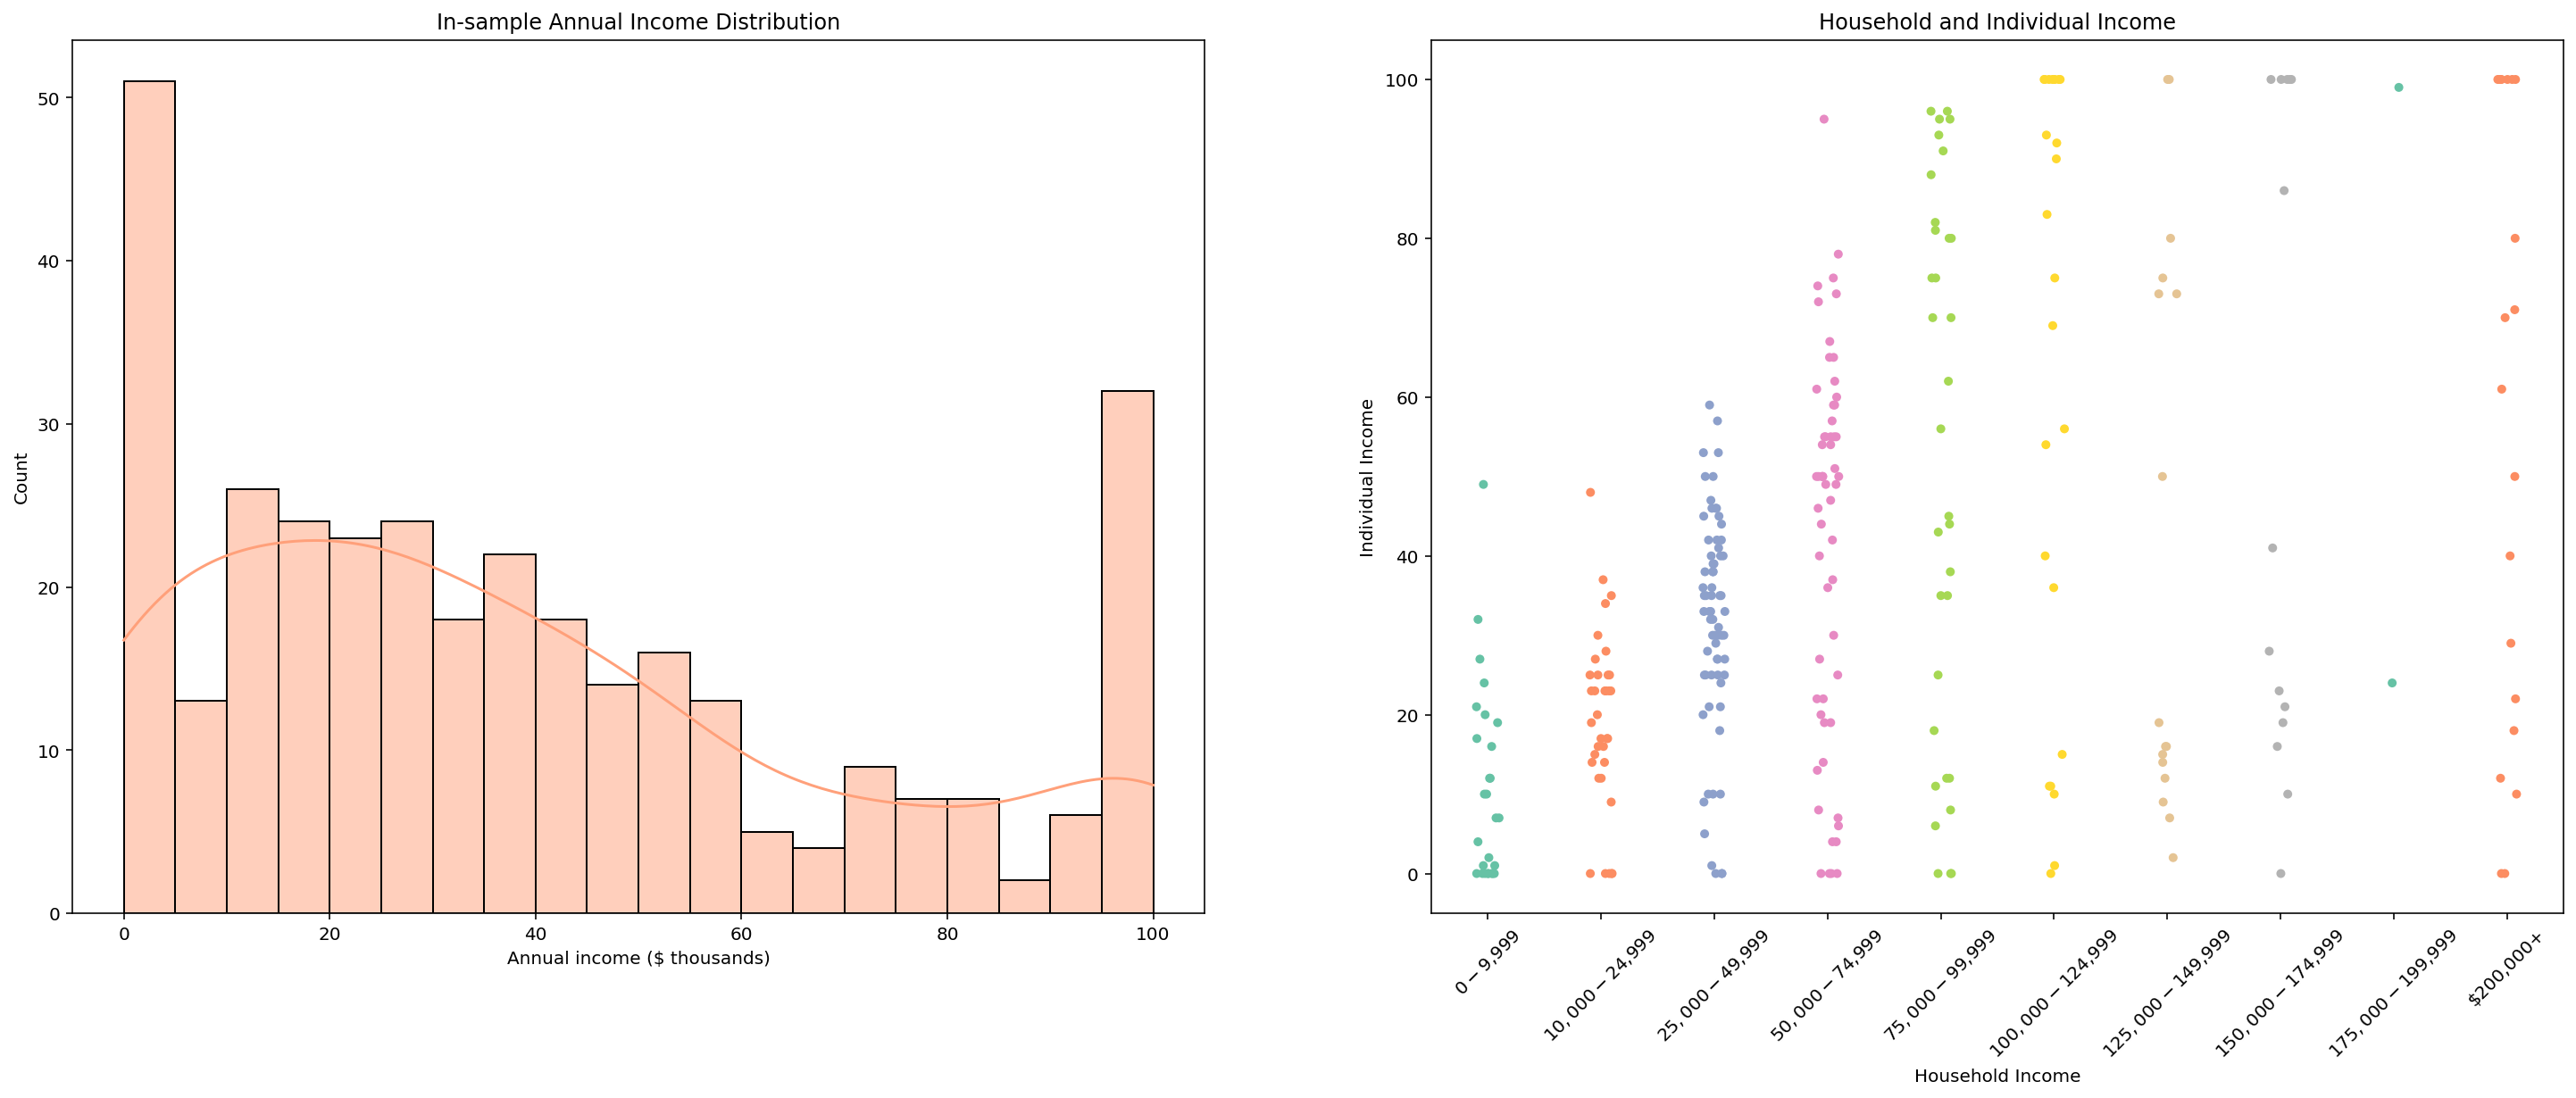

In [ ]:
df['log_income'] = np.log1p(df.income)

fig, ax = plt.subplots(1, 2, figsize=(25, 9), sharey=False)
sns.histplot(data=df, x='income', bins=20, kde=True, color='lightsalmon', ax=ax[0])
ax[0].set(
    title='In-sample Annual Income Distribution',
    xlabel='Annual income ($ thousands)',
    ylabel='Count'
    )

sns.stripplot(data=df, x="hh_income", y="income", ax=ax[1], palette='Set2')
ax[1].set(
    title='Household and Individual Income',
    xlabel='Household Income',
    ylabel='Individual Income'
    )
for tick in ax[1].get_xticklabels():
    tick.set_rotation(45)

plt.show()

- The distribution of annual income is log-normal (not surprising), but the distribution has a heavier tail on the right (it can be the clip of the values on $100 thousand).
- There is no clear correlation between individual income and household income.
- We can see that households with lower income form a cluster, and the spread of individual income is growing with increase of household income.

Also remember about getting rid of observations with unknown annual income!

In [ ]:
df.dropna(inplace=True)
df.shape

(296, 32)

### Resume Gaps

Resume gaps are periods when a person did not have formal employment. These gaps can be a cause for concern and represent problems with stable employment.

So here we just look at their distribution (omitting $gap\_length=0$)

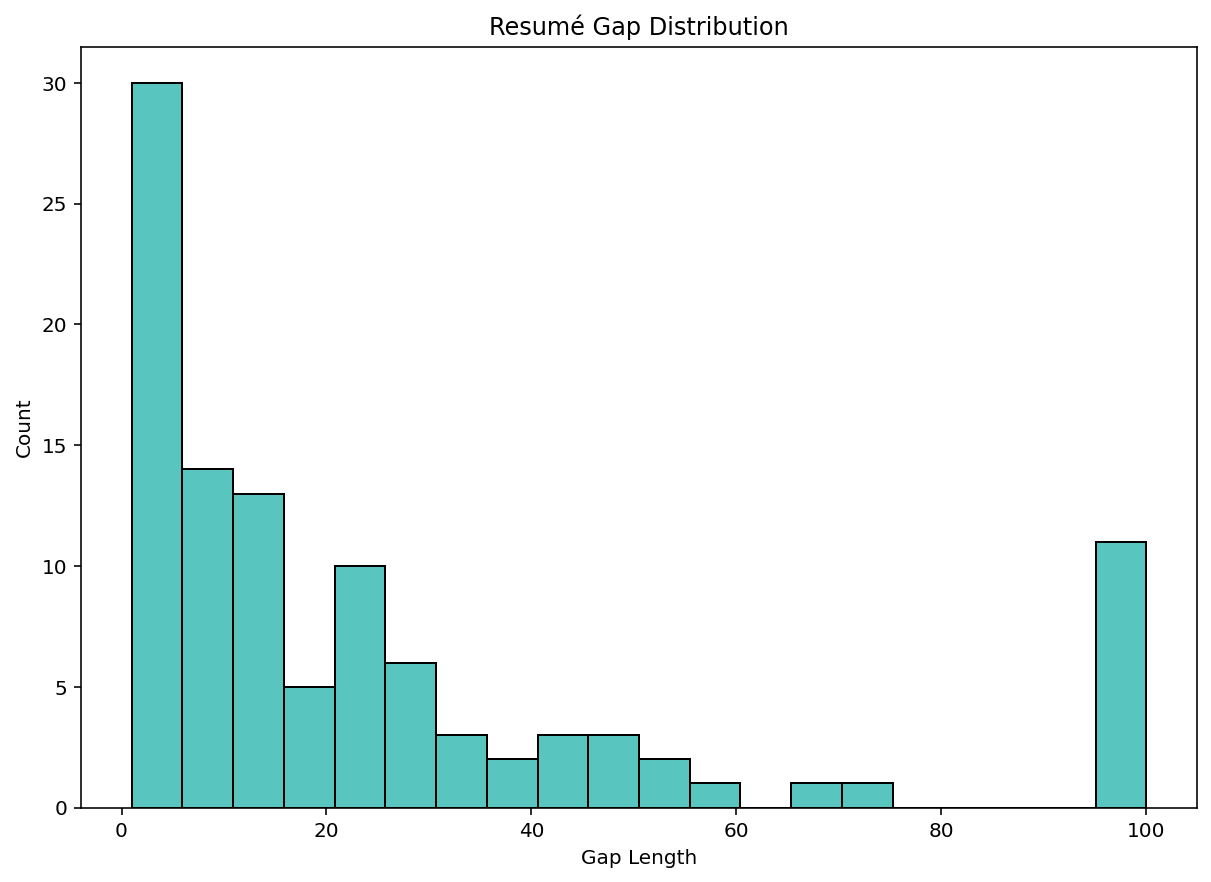

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 7))
sns.histplot(data=df[df.gap_length!=0], x='gap_length', bins=20, kde=False, color='lightseagreen', ax=ax)
ax.set(
    title='Resumé Gap Distribution',
    xlabel='Gap Length',
    ylabel='Count'
    )

plt.show()

The distribution of resumé gap is log-normal or exponential with a heavier right tale, and in general gap length is less than 2 months.

### Days Hospitalized 


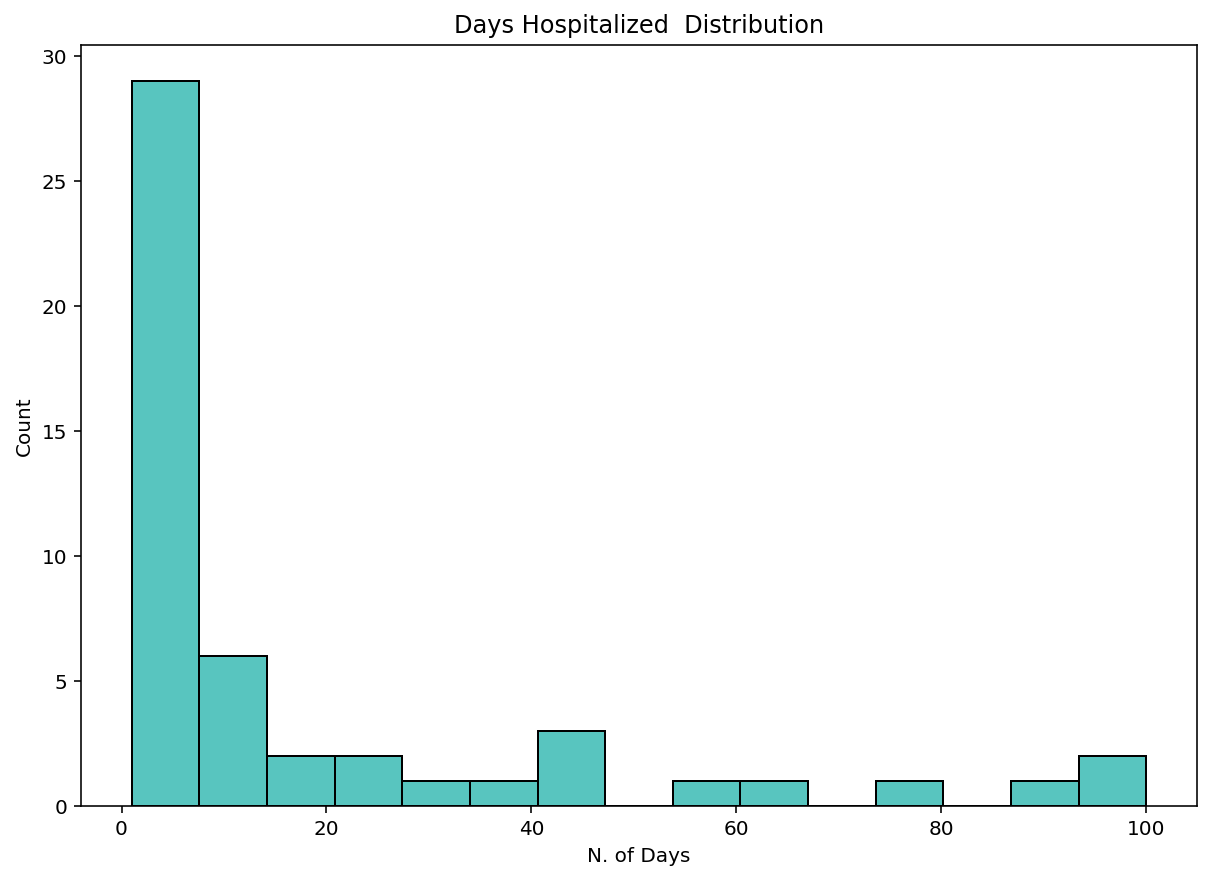

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 7))
sns.histplot(data=df[df.days_hosp!=0], x='days_hosp', bins=15, kde=False, color='lightseagreen', ax=ax)
ax.set(
    title='Days Hospitalized  Distribution',
    xlabel='N. of Days',
    ylabel='Count'
    )

plt.show()



The distribution of days hospitalized is log-normal or exponential with outliers at 0, and we can say that most of cases of hospitalization were taking under 20-40 days.

## Feature Extraction

### Relative income

Mismatches between individual income and household income might be depressing. That's why it might be good to look at $\frac{income}{hh\_income}$ proportion. As we don't have exact amounts of household income, we'll use range average (e. g. 25,000-49,999 would convert to 37,499.5, but 200,000+ would still be 200,000).

In [ ]:
df['hh_income_avg'] = df.hh_income.str.replace('+', '').str.replace('$', '').str.replace(',', '').str.split('-')

def range_avg(x):
  if type(x) == float:
    return np.nan
  elif len(x) == 2:
    return (int(x[1]) + int(x[0]))/2
  elif len(x) == 1:
    return int(x[0])

df['hh_income_avg'] = df['hh_income_avg'].apply(range_avg)
df['relative_income'] = df['income']*1000 / df['hh_income_avg']

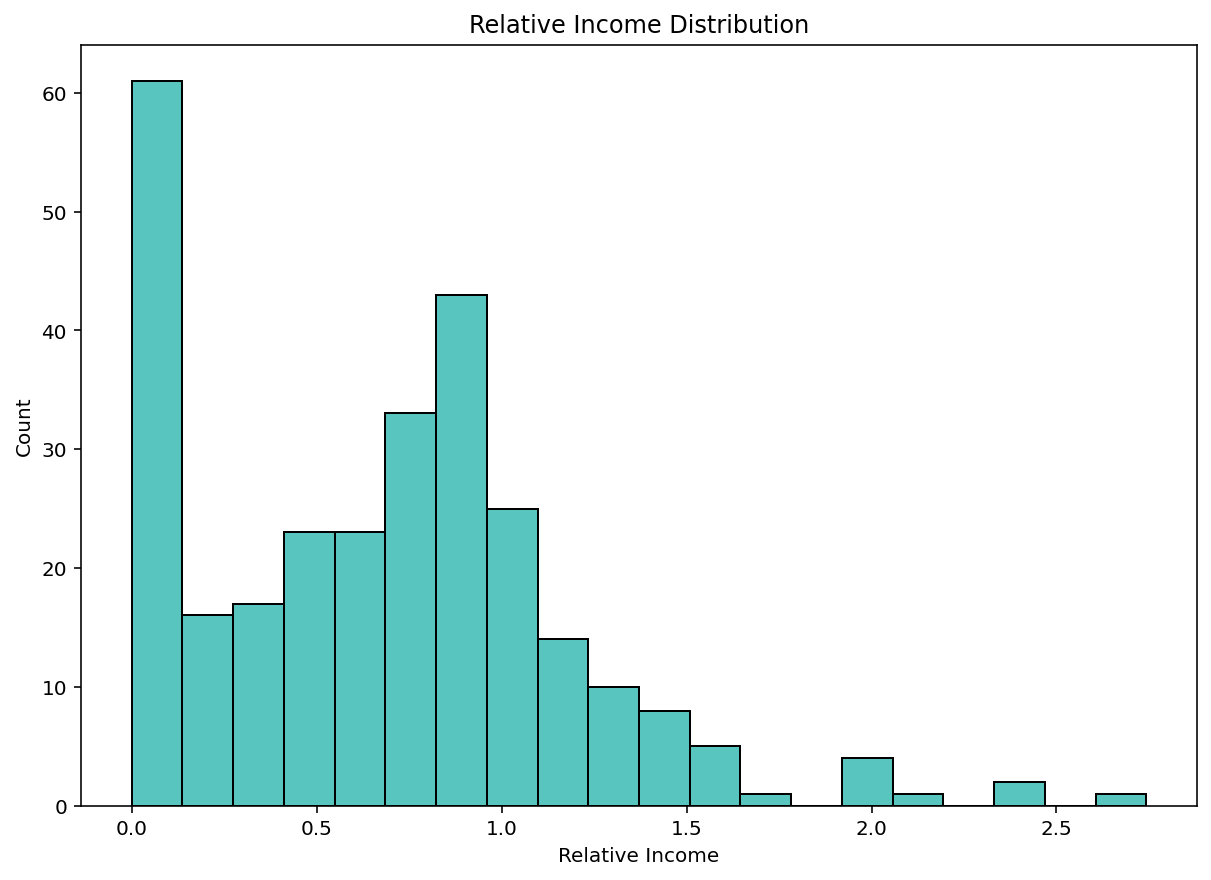

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 7))
sns.histplot(data=df[df.relative_income<3], x='relative_income', bins=20, kde=False, color='lightseagreen', ax=ax)
ax.set(
    title='Relative Income Distribution',
    xlabel='Relative Income',
    ylabel='Count'
    )

plt.show()

The relative income distribution is normal with expected equal to 1, but also we have outliers at zero. We can say that there are cases when the individual does not earn money due to mental illnesses or some other reasons, but household earns a decent living.

## Relationships

First, we should look at the correlation matrix in order to understand which regressors affect the target variable, and which ones correlate with each other.

### Correlation Matrix

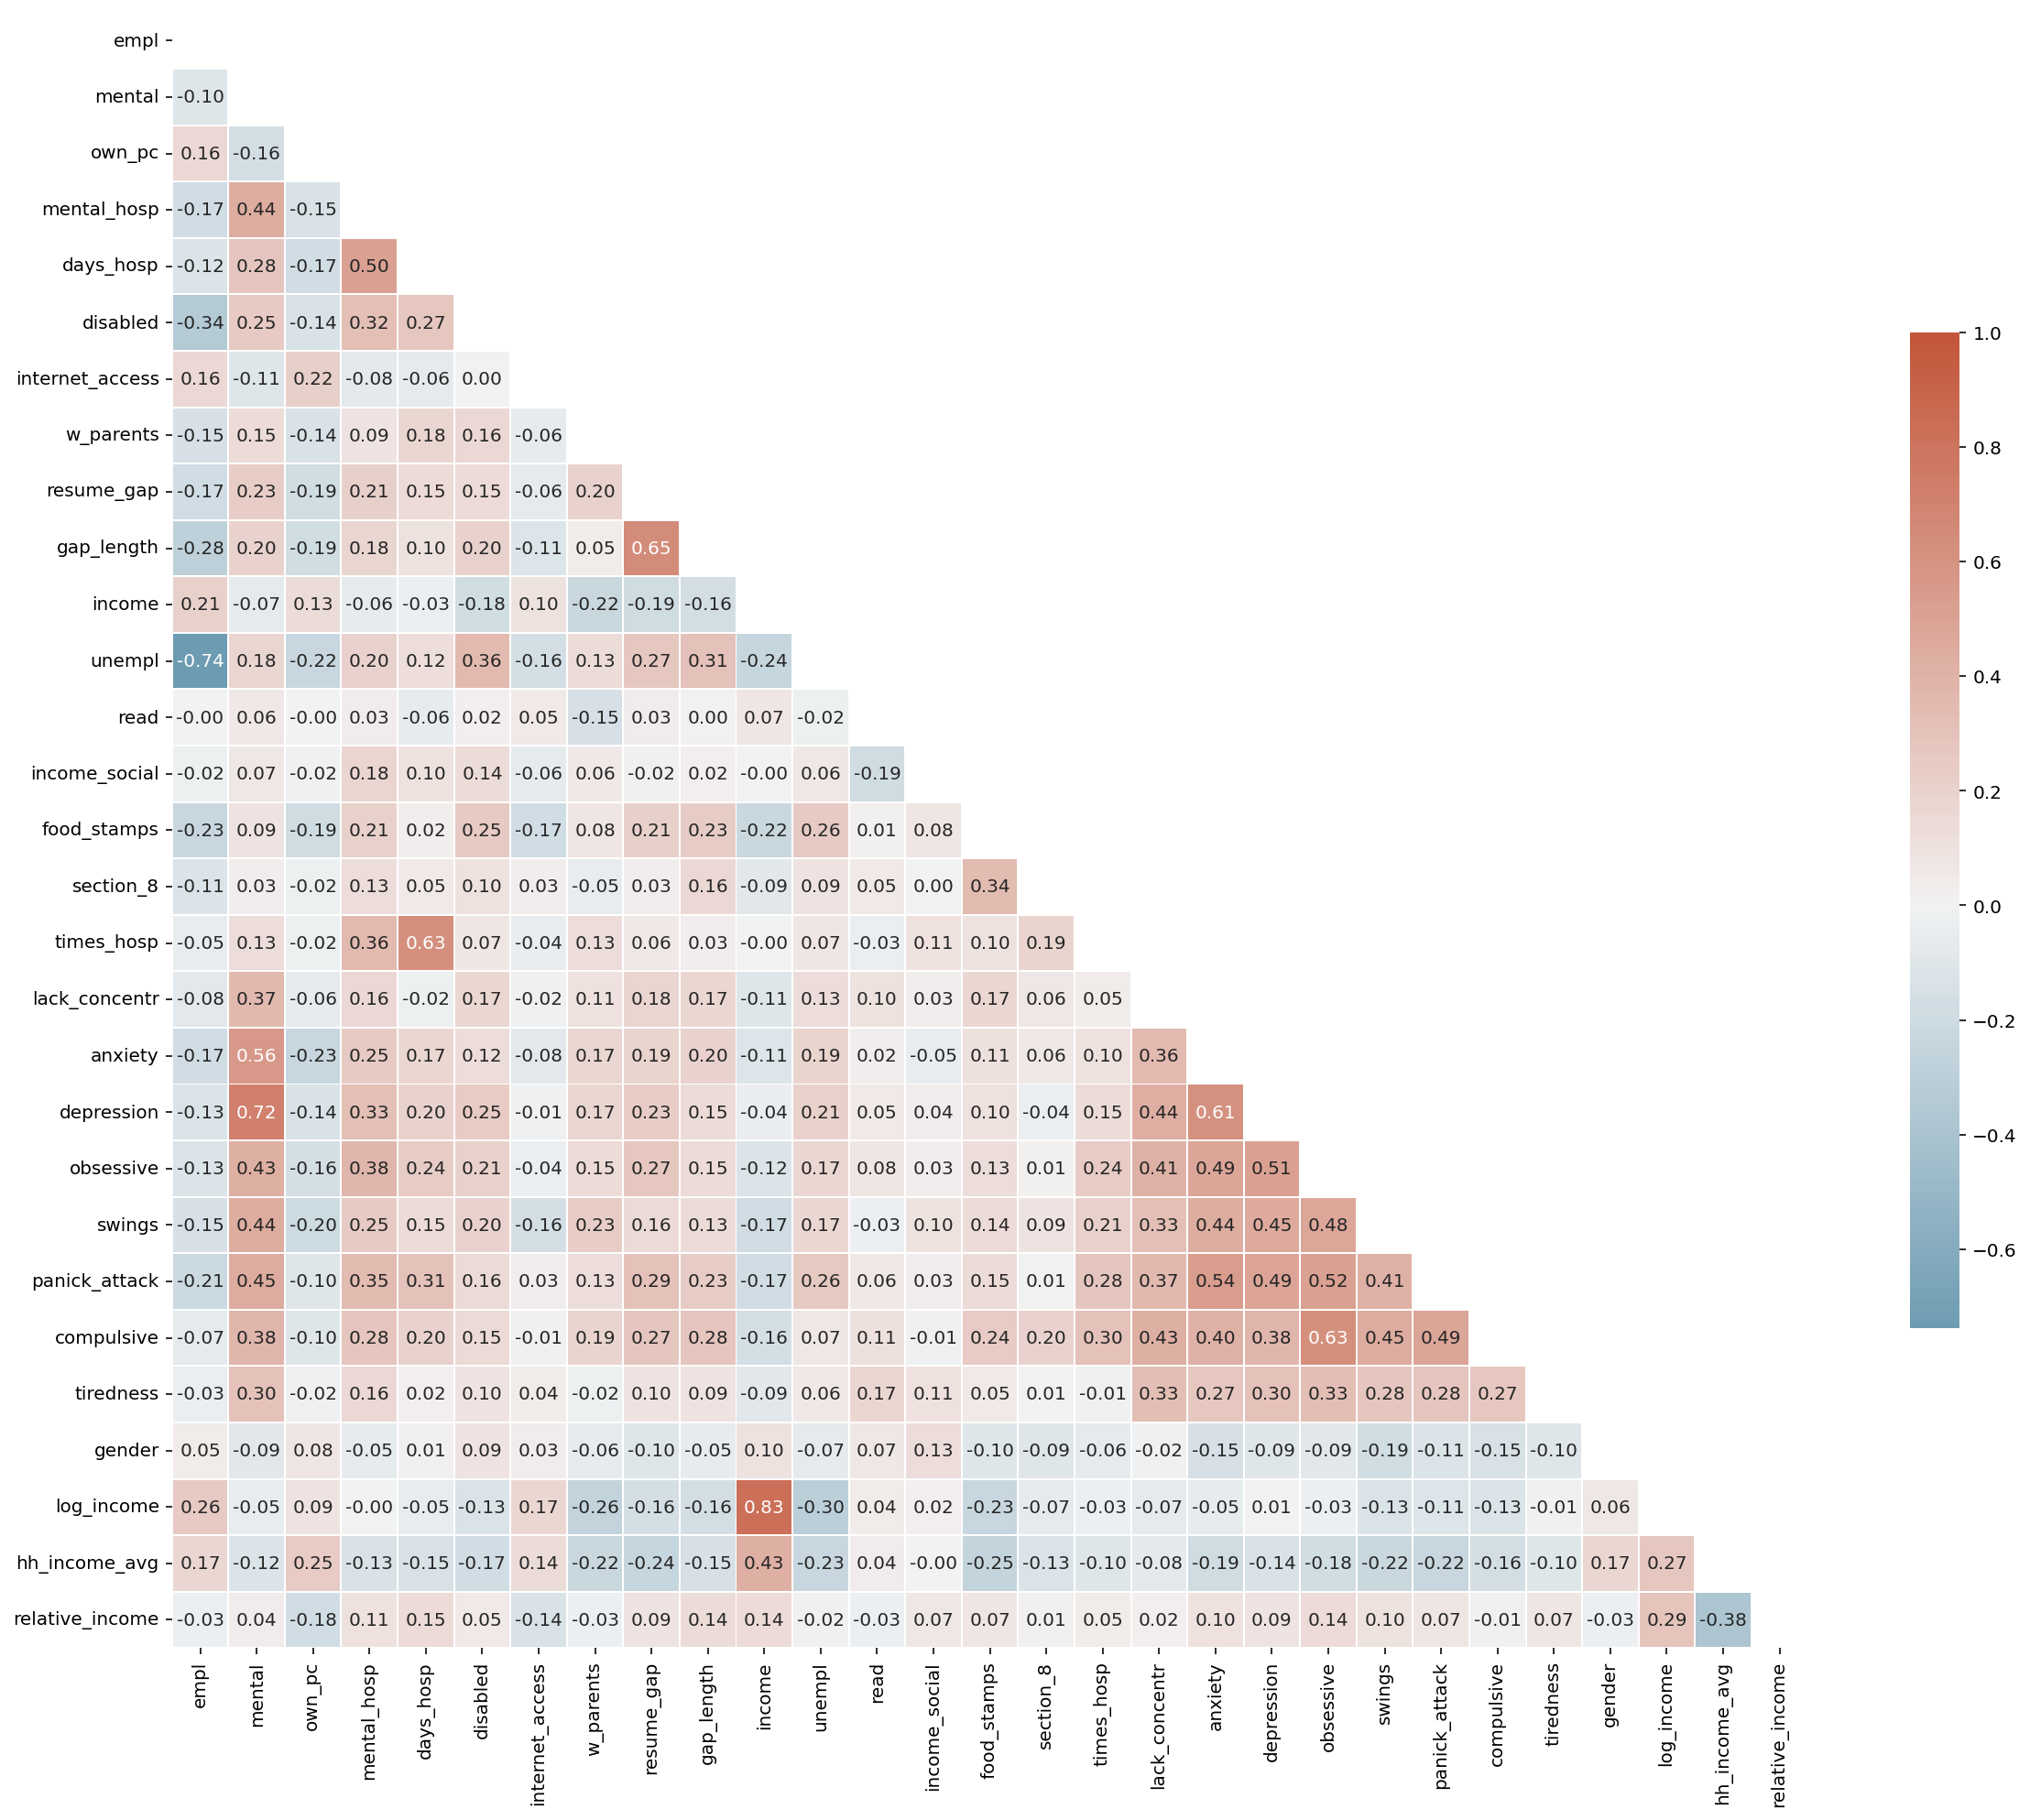

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

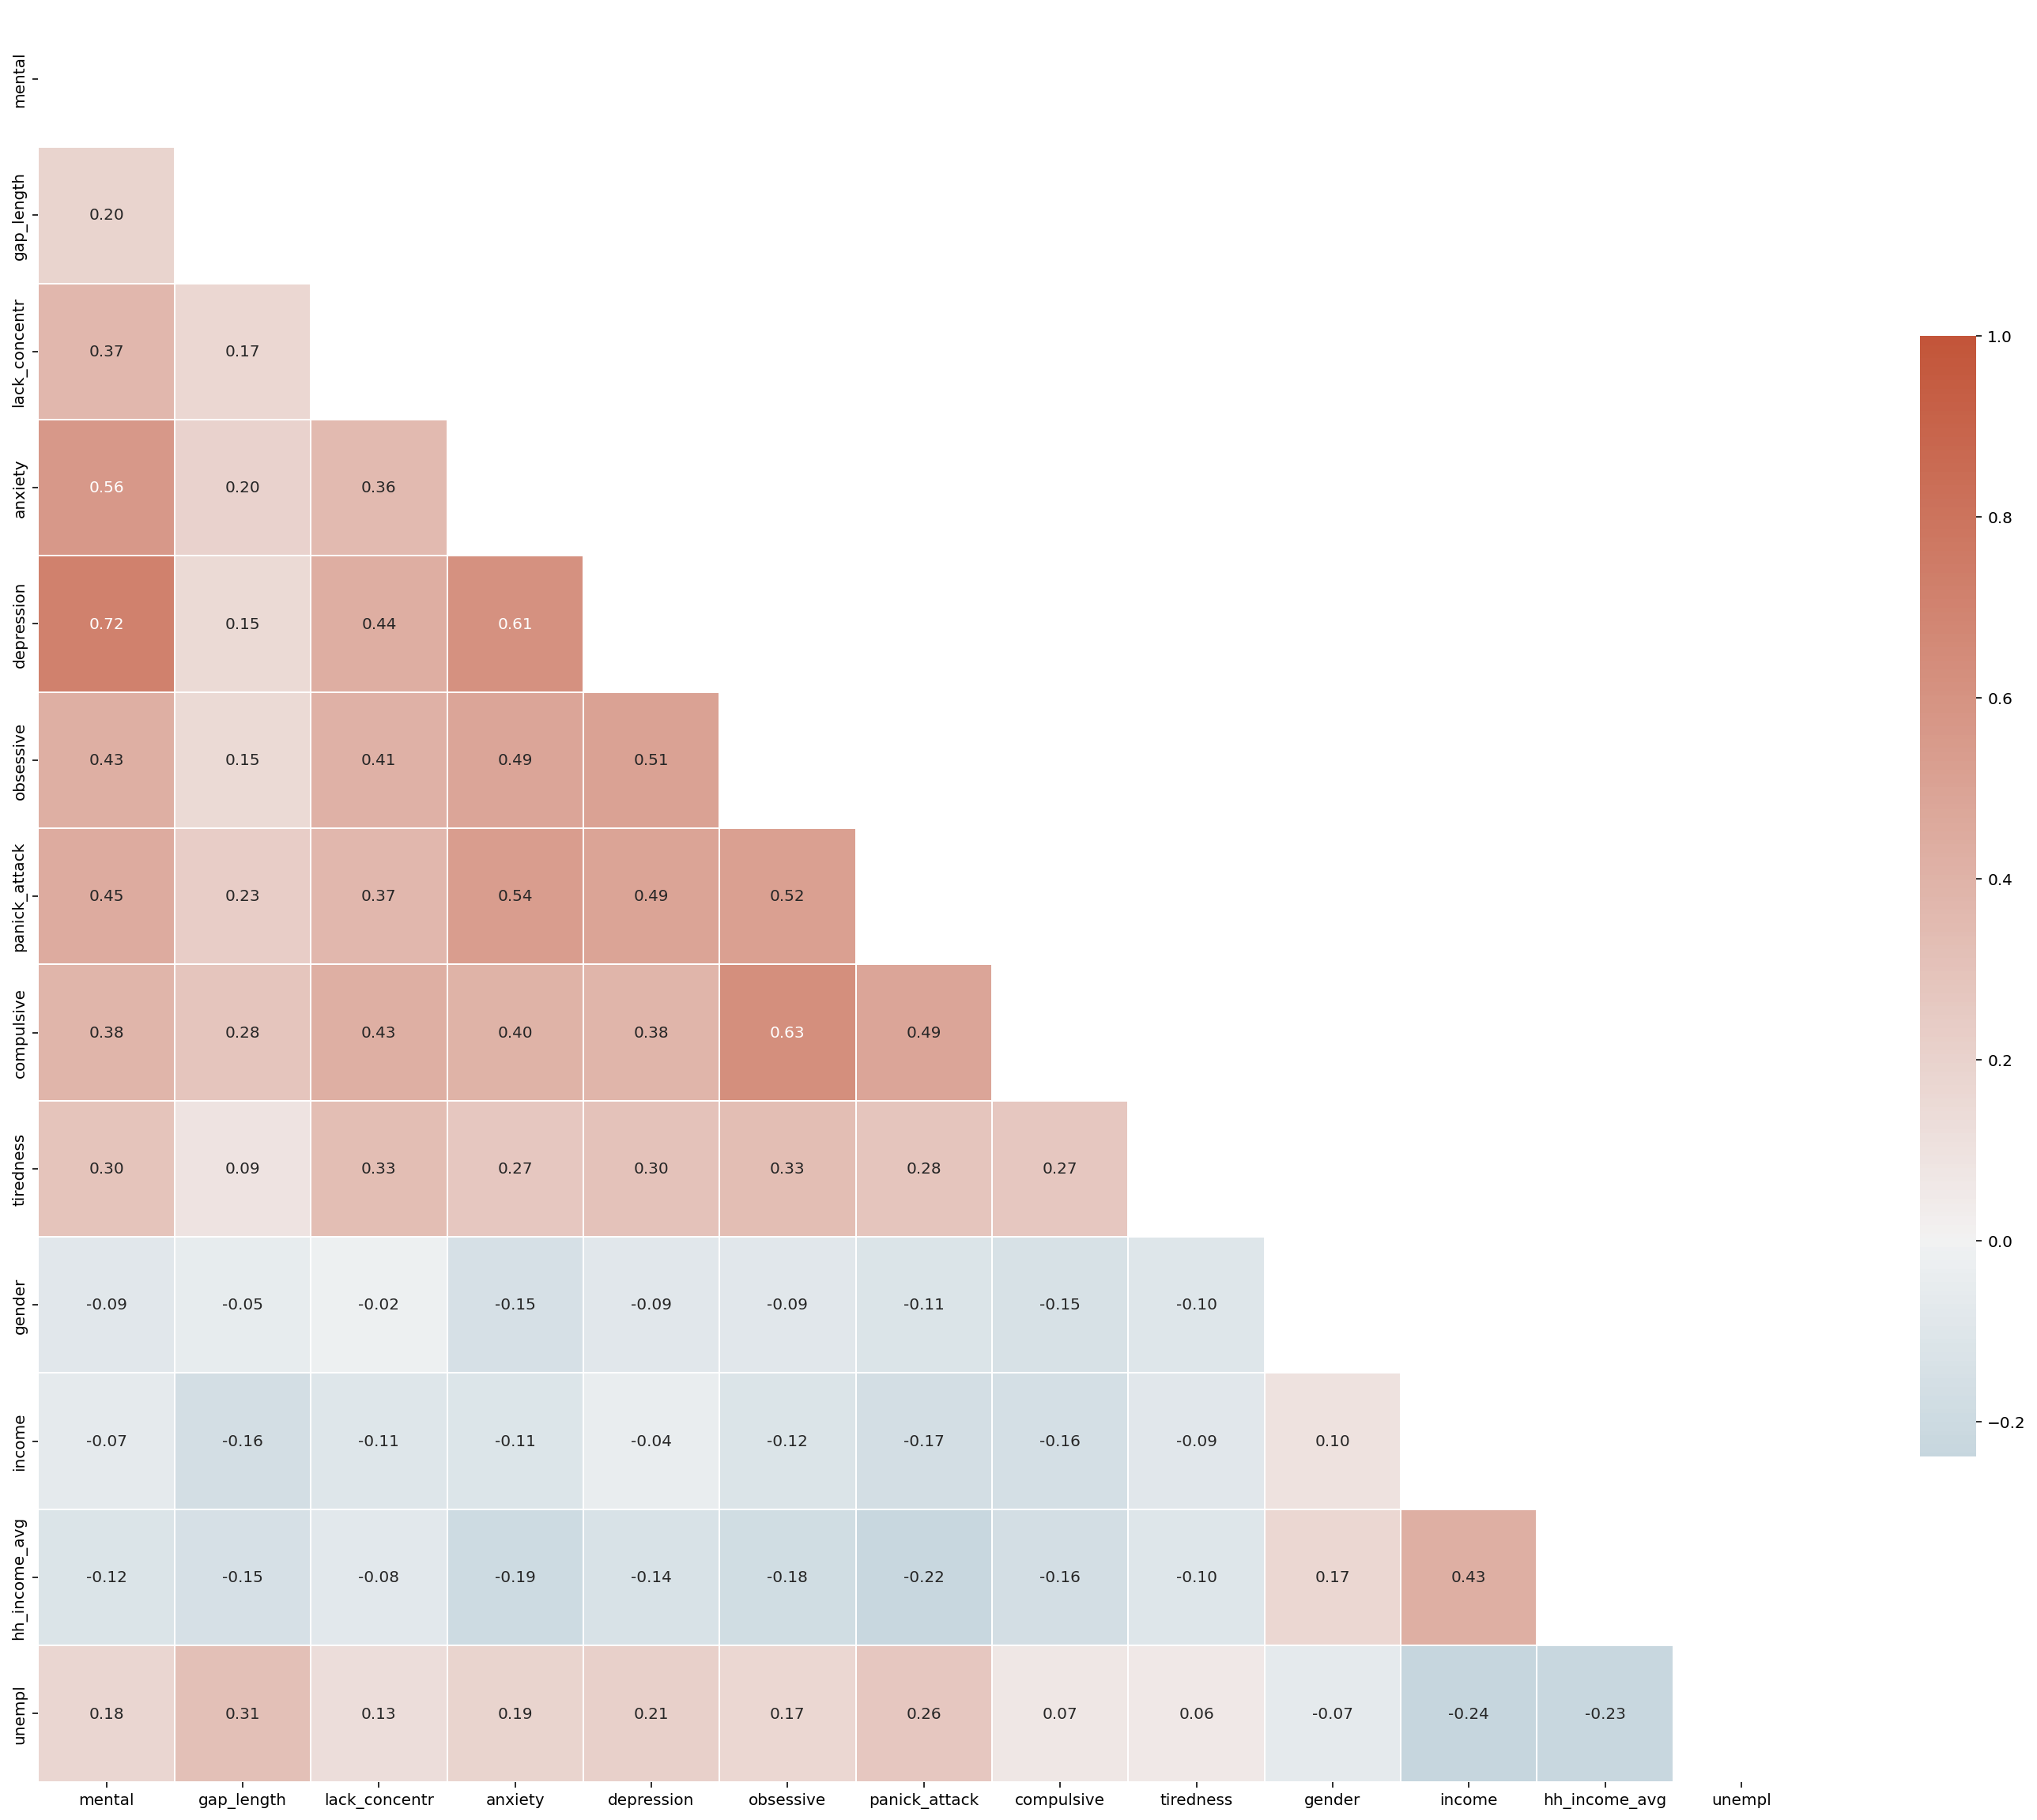

In [ ]:
v1 = ['mental',
      'gap_length', 'lack_concentr',
      'anxiety', 'depression', 'obsessive', 
      'panick_attack', 'compulsive',
      'tiredness', 'gender']
v2 = ['income', 'hh_income_avg']
v3 = ['age']
target = ['unempl']

selected = v1 + v2 + v3 + target

corr = df[selected].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.tight_layout()

* In this correlation matrix we can see that indicators of mental health are strongly correlated (which was kinda obvious).

* Unemployment and disability are negatively correlated, which might represent discrimination of disabled people and consecutive problems with employment.

* There are some slight correlates for unemployment: panick attack, depression, food stamps, gap length, mental hospitalization. These relationships are the reason to investigate the importance of mental health for employment.

### Conditional Distributions

Just out of interest, let's see how income interacts with categorical variables, such as mental health, gender or employment.

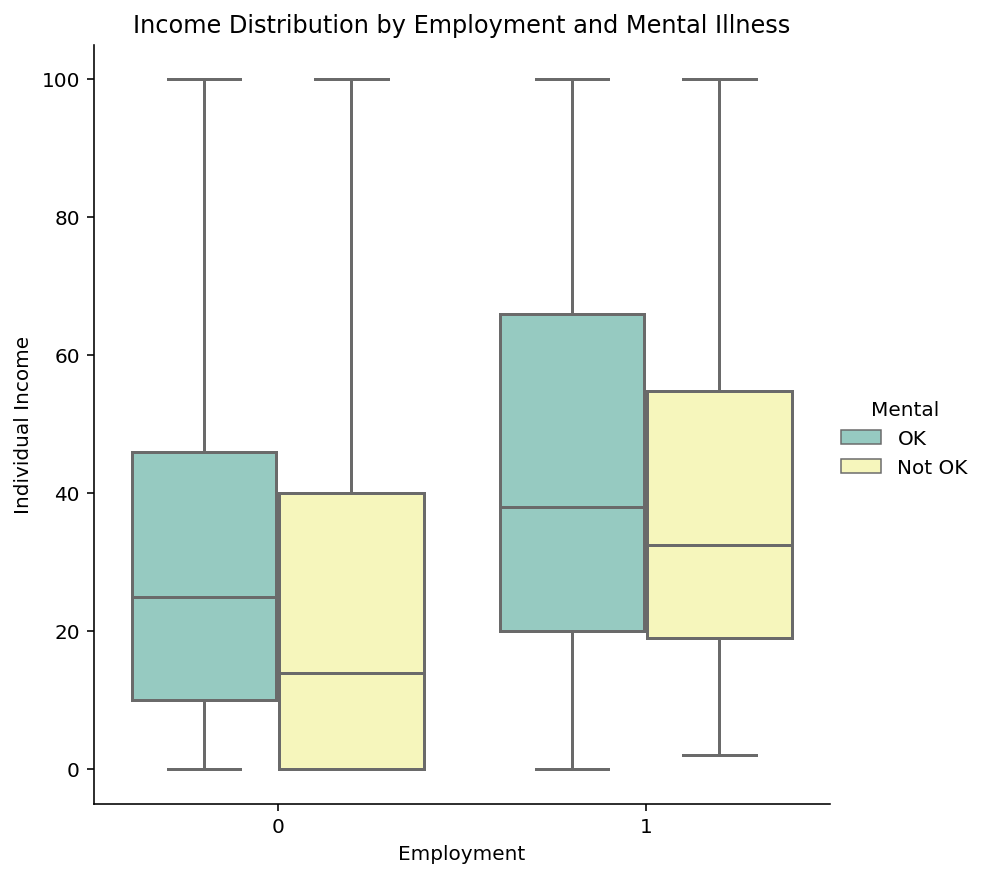

In [ ]:
sns.catplot(
    x = "empl", 
    y="income", 
    hue = 'Mental', 
    palette='Set3', 
    kind="box", 
    data=df.assign(Mental=df.mental.map({1: "Not OK", 0: "OK"})),
    height=6)
plt.title('Income Distribution by Employment and Mental Illness')
plt.xlabel('Employment')
plt.ylabel('Individual Income')
plt.show()

- On average, individual income of employed people are higher than of jobless ones (surprisingly).
- Persons with mental illnesses are having less income than people without them.

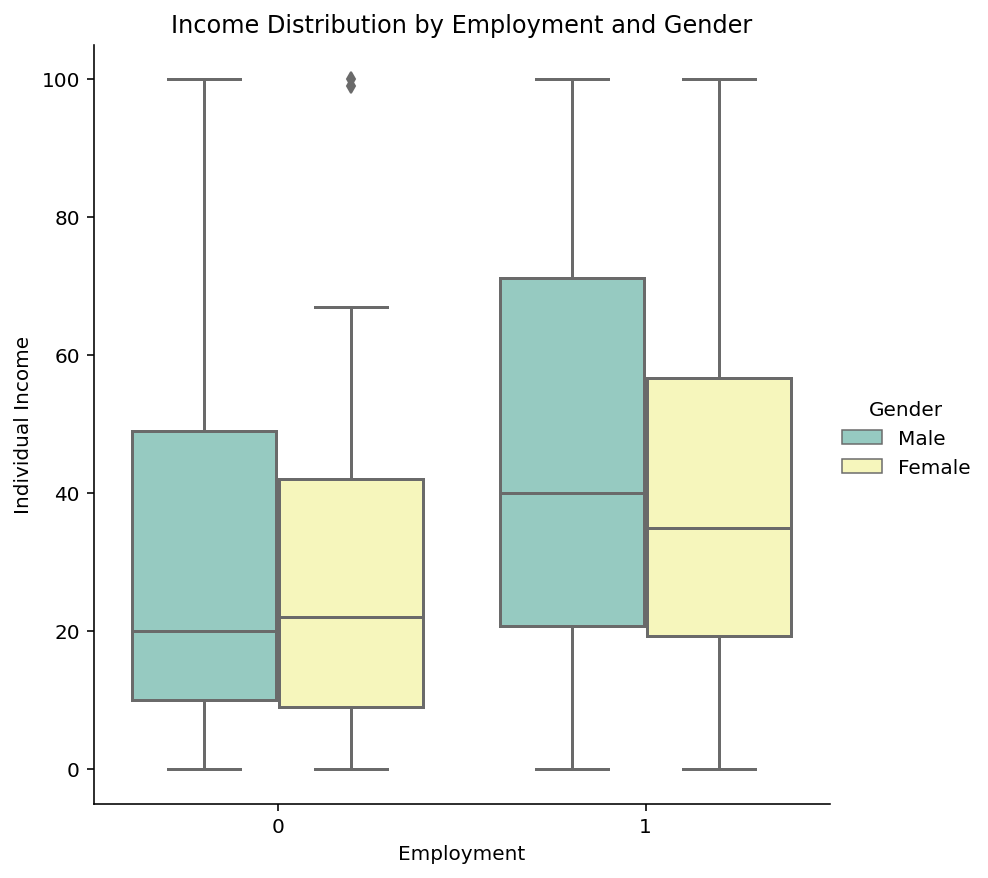

In [ ]:
sns.catplot(
    x = "empl", 
    y="income", 
    hue = 'Gender', 
    palette='Set3', 
    kind="box", 
    data=df.assign(Gender=df.gender.map({1: "Male", 0: "Female"})),
    height=6)
plt.title('Income Distribution by Employment and Gender')
plt.xlabel('Employment')
plt.ylabel('Individual Income')
plt.show()

- One more time, on average, individual income of employed people are higher than of jobless ones (not surprisingly this time).
- Generally, unemployed women have lower income that unemployed men.
- On the other side, employed men are earning more than employed women ([see here](https://www.swissinfo.ch/rus/работа-и-зарплата_женщины-в-швейцарии-склонны-занижать-свои-зарплаты-и-доходы-/45554158)).

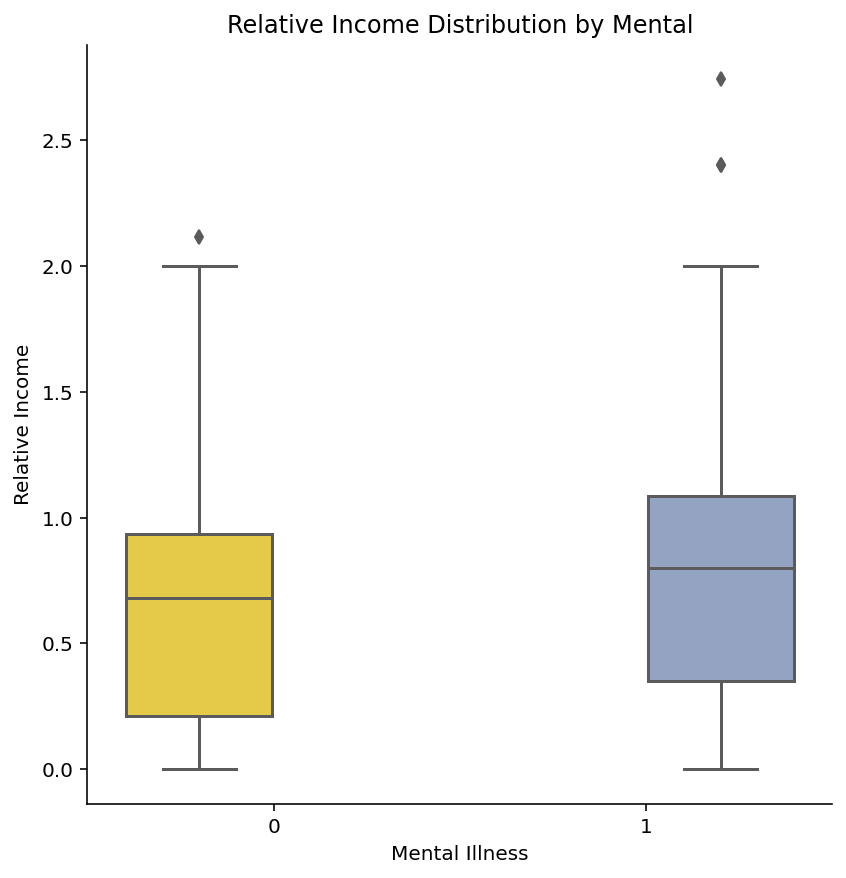

In [ ]:
sns.catplot(
    x = "mental", 
    y="relative_income", 
    hue = 'mental', 
    palette='Set2_r', 
    kind="box", 
    data=df[df.relative_income<3],
    height=6)
plt.title('Relative Income Distribution by Mental')
plt.xlabel('Mental Illness')
plt.ylabel('Relative Income')
plt.show()

All graphs demonstrate fat-tailed distribution of income, which corresponds to our expectations about population.

Additionally, it might be reasonable to check...

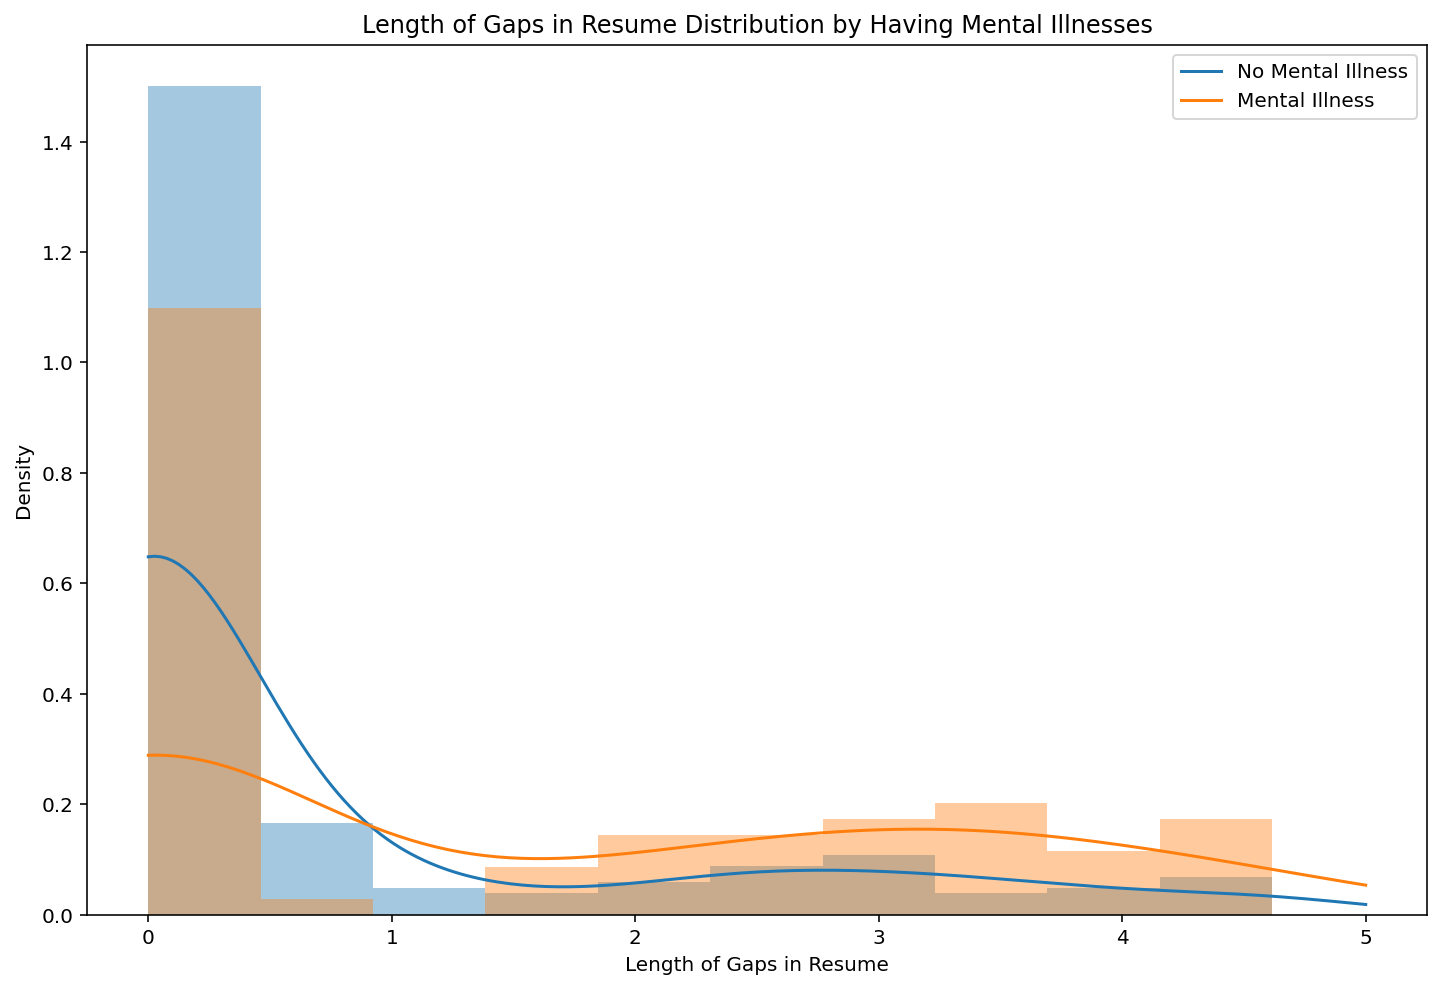

In [ ]:
fig, ax = plt.subplots(figsize=(12,8), ncols=1, nrows=1)
sns.distplot(np.log1p(df[df['mental'] == 0]['gap_length']), hist=True, bins = 10, kde_kws={'clip': (0.0, 5.0), "label": "No Mental Illness"})
sns.distplot(np.log1p(df[df['mental'] == 1]['gap_length']), hist=True, bins = 10, kde_kws={'clip': (0.0, 5.0), "label": "Mental Illness"})
ax.set(
    title='Length of Gaps in Resume Distribution by Having Mental Illnesses',
    xlabel='Length of Gaps in Resume',
    ylabel='Density'
    ) 
plt.legend()
plt.show()

On average, persons with mental diseases have longer gaps in their resumé in comparison to individuals without them.





# 3. Research Questions and Hypotheses

Mental health problems are important for contemporary economy. According to WHO, 264 millions people are depressed over the world, which is estimated as 1 trillion dollars cost annually in lost productivity ([see here](https://www.who.int/teams/mental-health-and-substance-use/promotion-prevention/mental-health-in-the-workplace)). This problem has become more serious with the COVID-19 pandemic. Many people faced the temporary solitude during self-isolation, lack of social relations and employment problems ([see here](https://www.scientificamerican.com/article/major-depressive-disorders-have-an-enormous-economic-impact/)). Mental illnesses make persons less productive, they need more care and time to rehabilitation and so are more susceptible to job leaving. Obviously, this problem affects to economy directly either by making company less solvent or by damaging institutional base of our society.

One purpose of this work is to investigate relation between mental health problems and unemployment, which is vital due to the widespread of mental illnesses nowadays. By the way, this topic is quite in debate in science literature, since the direction of causality is not resolved yet ([see here](https://onlinelibrary.wiley.com/doi/abs/10.1002/hec.3083?casa_token=9GX3Noj4sR4AAAAA:Yr5lHHtwJ6Q58vdFExONLCc1EaCnk8uBgJ5e5133DGew0F07rRonYjtTeV0jvAXOcAeaZ-pfZrjorDf6)). Our research is aimed at checking the adequacy of the opinion that mental problems significantly influence the probability of  leaving a job.

Finally, during the COVID-19 pandemic many people had employment gap (gap in resumé). According to survey, most of workers think that it may affect their employed status in future ([see here](https://www.forbes.com/sites/carolinecastrillon/2021/03/14/5-ways-to-handle-an-employment-gap-on-your-resume/?sh=6d234b9c412a)). We would like to estimate how the length of gap in resume is connected with the probability of becoming unemployed.

## Research questions

* Do mental health problems influence job leave?

* Is the length of employment gaps significant for become unemployed?

## Hypotheses

* Having mental illnesses significantly and positively affects the probability of becoming an unemployed person.
 
* The length of the resume gap is not important to the unemployment probability.

# 4. Models

To evaluate different models, we will combine ML and Economics approaches. 
 
 
 
1.   First, we compare several model designs using classical ML metrics and approaches (e. g. cross-validation).
2.   Then we choose the best model and speculate on its validity.
3.   Finally, we look at the chosen model from an econometrics perspective by observing its statistics and marginal effects.



## ML-based Evaluation

In [ ]:
!pip install catboost
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, f1_score, accuracy_score, make_scorer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.inspection import permutation_importance

     |████████████████████████████████| 76.4 MB 21 kB/s 


In [ ]:
def prepare_df(data, vars, vars_to_normalize, vars_to_dummify, target):
  data = data.reset_index(drop=True)
  v1 = data[vars]
  v2 = (data[vars_to_normalize] - data[vars_to_normalize].mean()) / data[vars_to_normalize].std()
  v3 = pd.get_dummies(data[vars_to_dummify], drop_first=True)
  v4 = data[[target]]
  d = pd.concat([v1,v2,v3,v4], axis=1)
  d.rename(columns = lambda x: x.replace(' ', ''), inplace=True)


  return d

v1 = ['mental', 'disabled', 
      'gap_length', 
      'days_hosp',
      'internet_access',
      'food_stamps',
      'section_8',
      'own_pc',
      'lack_concentr',
      'anxiety', 'depression', 'obsessive',
      'swings', 'panick_attack', 'compulsive',
      'tiredness', 
      'gender']
v2 = [#'income', 
      'hh_income_avg']
v3 = ['age', ]
target = 'empl'

train, test = train_test_split(df, random_state=12, stratify=df['unempl'])
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

train = prepare_df(train, v1, v2, v3, target)
test = prepare_df(test, v1, v2, v3, target)

X_train, y_train = train.loc[:, train.columns != target], train[[target]]
X_test, y_test = test.loc[:, test.columns != target], test[[target]]
y_train = y_train*2 - 1
y_test = y_test*2 - 1

scorer = make_scorer(roc_auc_score)

def show_roc(y_test, y_proba):
    roc = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    fig, ax = plt.subplots(1, figsize=(10,7))
    lw = 2
    plt.plot(roc[0], 
            roc[1], 
            color='darkorange',
            lw=lw, 
            label='ROC curve (area = %0.2f)' % roc_auc
            )
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

results = pd.DataFrame(columns = ['Model', 'Accuracy', 'ROC-AUC score', 'F1-score', 'best params'])

### Logistic Regression

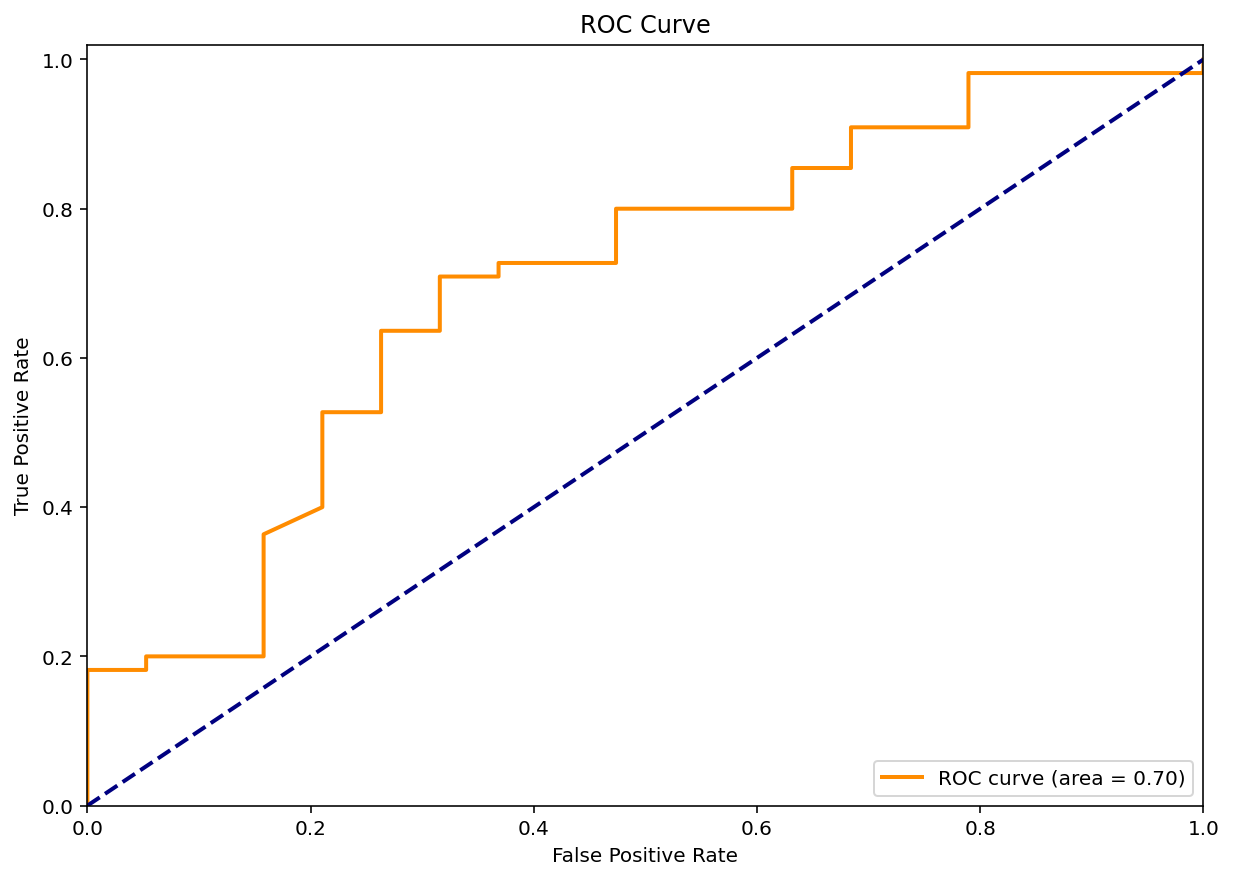

In [ ]:
params = {
    'l1_ratio': np.arange(0, 1.01, 0.1),
     'C': np.arange(0, 100.01, 10)
     }
m = GridSearchCV(estimator=LogisticRegression(penalty = 'elasticnet', solver = 'saga'), param_grid=params, scoring=scorer, cv=4)
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
y_proba = m.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
roc_auc = np.round(roc_auc, 4)
f1 = np.round(f1_score(y_test, y_pred), 4)
acc = np.round(accuracy_score(y_test, y_pred), 4)

show_roc(y_test, y_proba)

results = results.append(pd.DataFrame(
    np.array(['Logistic Regression', acc, roc_auc, f1, m.best_params_]).reshape(1, -1), columns = results.columns
    ), 
    ignore_index = True)

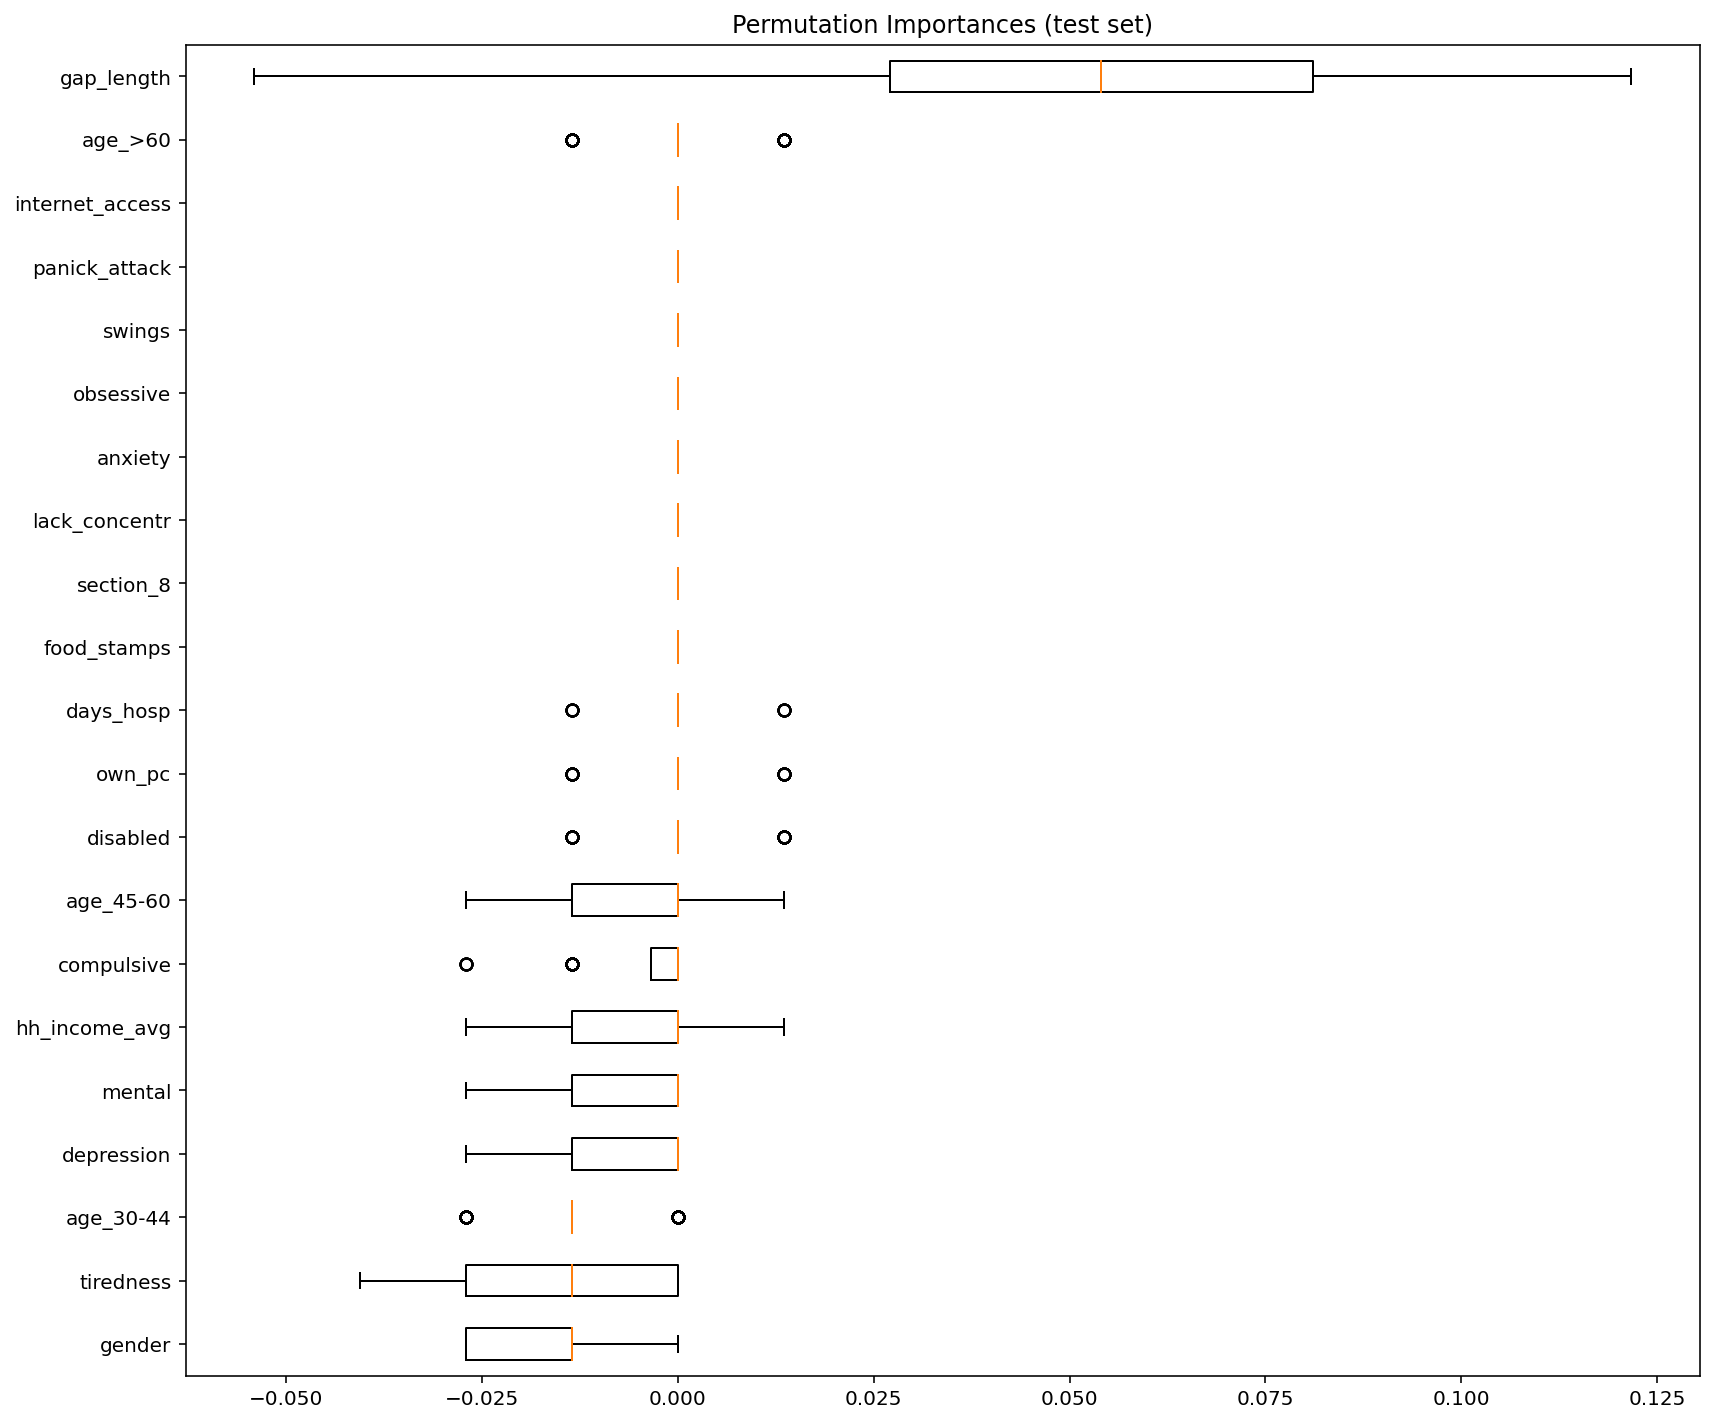

In [ ]:
result = permutation_importance(m, X_test, y_test, n_repeats=200,
                                random_state=11, n_jobs=-1, scoring='accuracy')
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize = (12, 10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [ ]:
m.best_params_

{'C': 10.0, 'l1_ratio': 0.0}

In [ ]:
import statsmodels.api as sm
y_train_ec = (y_train+1)/2
log_reg = sm.Logit(y_train_ec, X_train).fit_regularized(alpha=0)
print(log_reg.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4586270801618156
            Iterations: 104
            Function evaluations: 109
            Gradient evaluations: 104
                           Logit Regression Results                           
Dep. Variable:                   empl   No. Observations:                  222
Model:                          Logit   Df Residuals:                      201
Method:                           MLE   Df Model:                           20
Date:                Mon, 18 Oct 2021   Pseudo R-squ.:                  0.2682
Time:                        13:18:49   Log-Likelihood:                -101.82
converged:                       True   LL-Null:                       -139.13
Covariance Type:            nonrobust   LLR p-value:                 3.129e-08
                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

### Random Forest

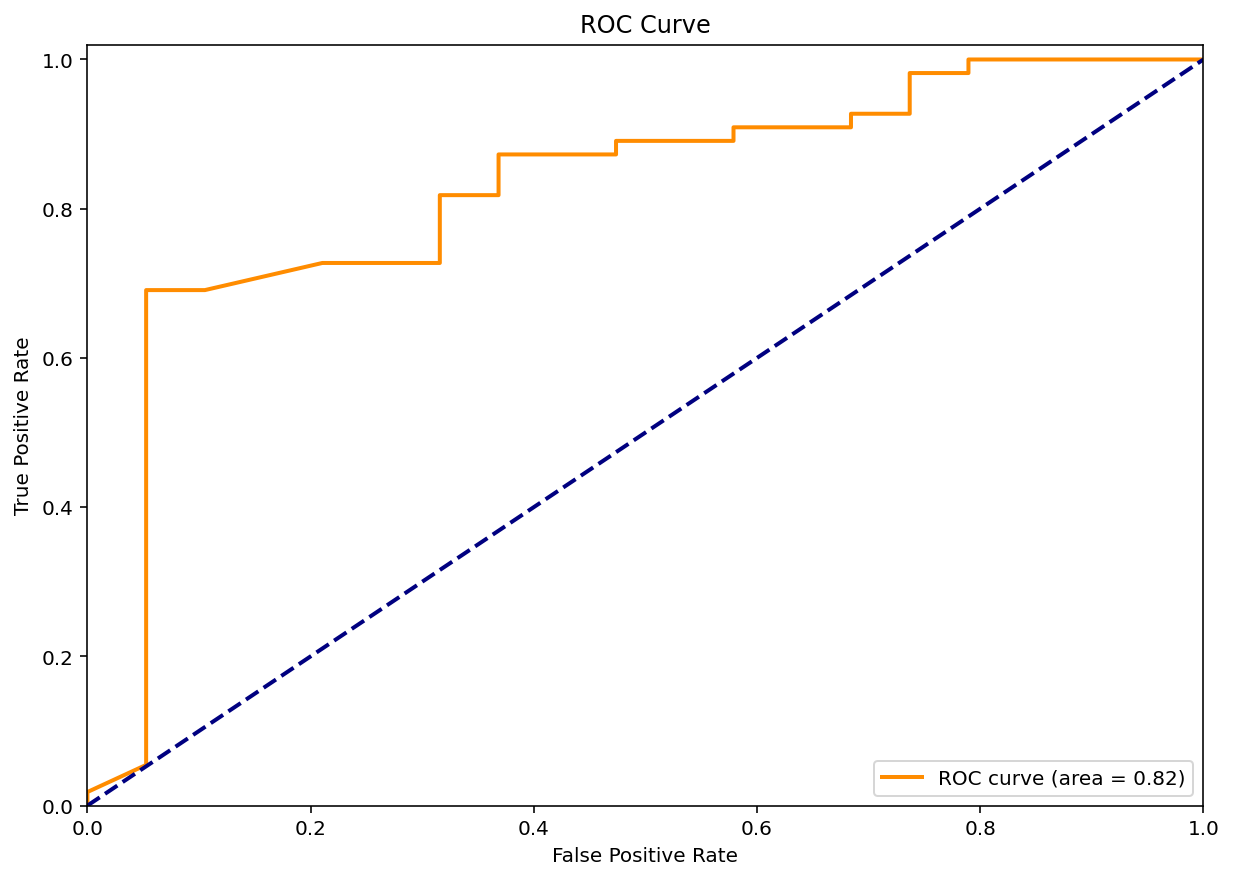

In [ ]:
params = { 
    'n_estimators': [100],
    'max_features': ['sqrt'],
    'max_depth' : np.arange(2, 6),
    'criterion' :['entropy']
    }
m = GridSearchCV(estimator=RandomForestClassifier(random_state = 11), param_grid=params, scoring=scorer, cv=4)
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
y_proba = m.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
roc_auc = np.round(roc_auc, 4)
f1 = np.round(f1_score(y_test, y_pred), 4)
acc = np.round(accuracy_score(y_test, y_pred), 4)

show_roc(y_test, y_proba)

results = results.append(pd.DataFrame(
    np.array(['Random Forest', acc, roc_auc, f1, m.best_params_]).reshape(1, -1), columns = results.columns
    ), 
    ignore_index = True)

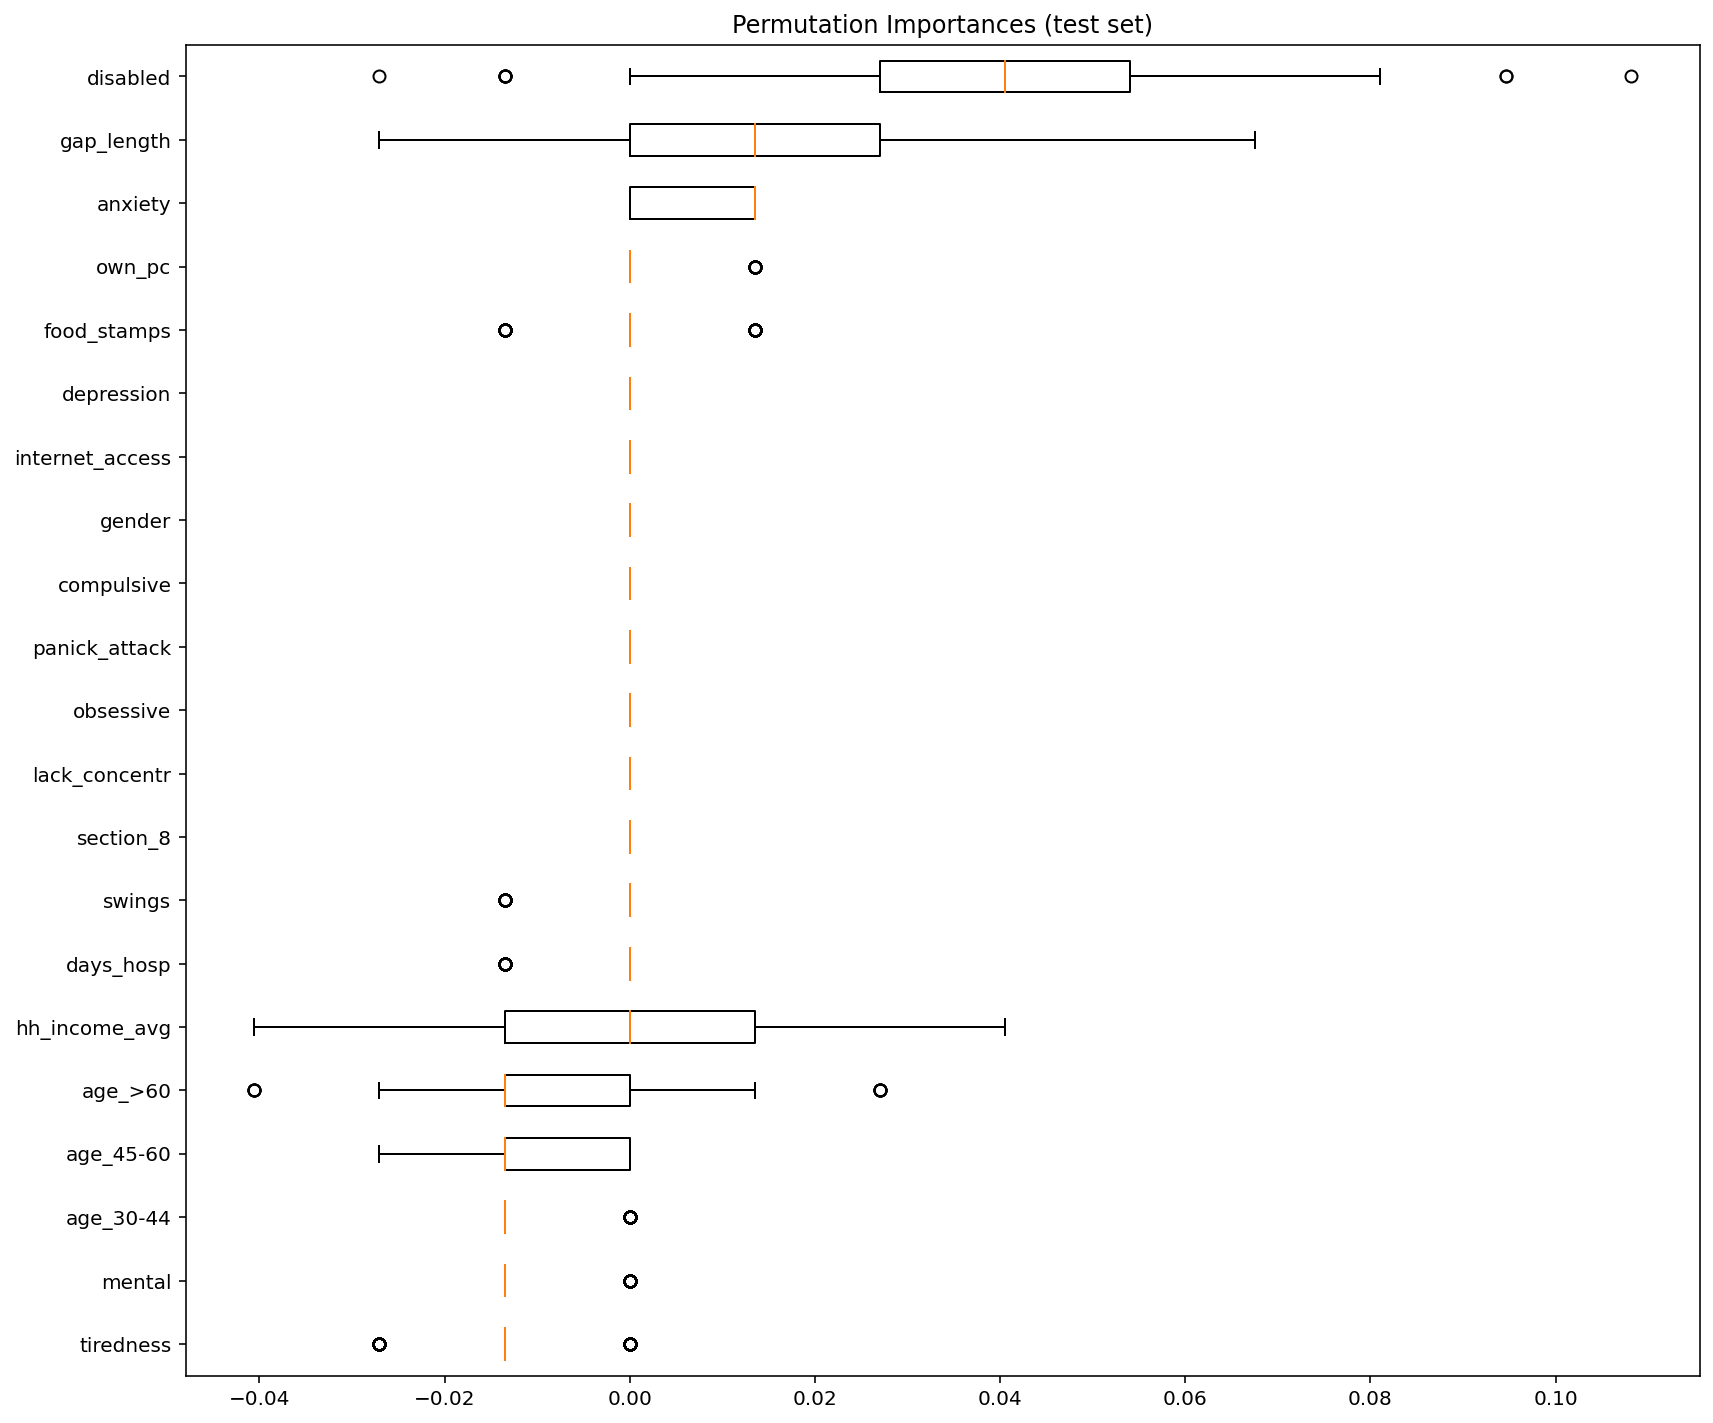

In [ ]:
result = permutation_importance(m, X_test, y_test, n_repeats=200,
                                random_state=11, n_jobs=-1, scoring='accuracy')
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize = (12, 10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [ ]:
m.best_estimator_.feature_importances_

array([0.0295658 , 0.16611108, 0.19775238, 0.05168552, 0.02871453,
       0.02708929, 0.00702233, 0.02278745, 0.00797745, 0.04697573,
       0.02264168, 0.01800136, 0.02022821, 0.02132149, 0.01106383,
       0.01502501, 0.01591265, 0.13188017, 0.03825592, 0.04996983,
       0.07001829])

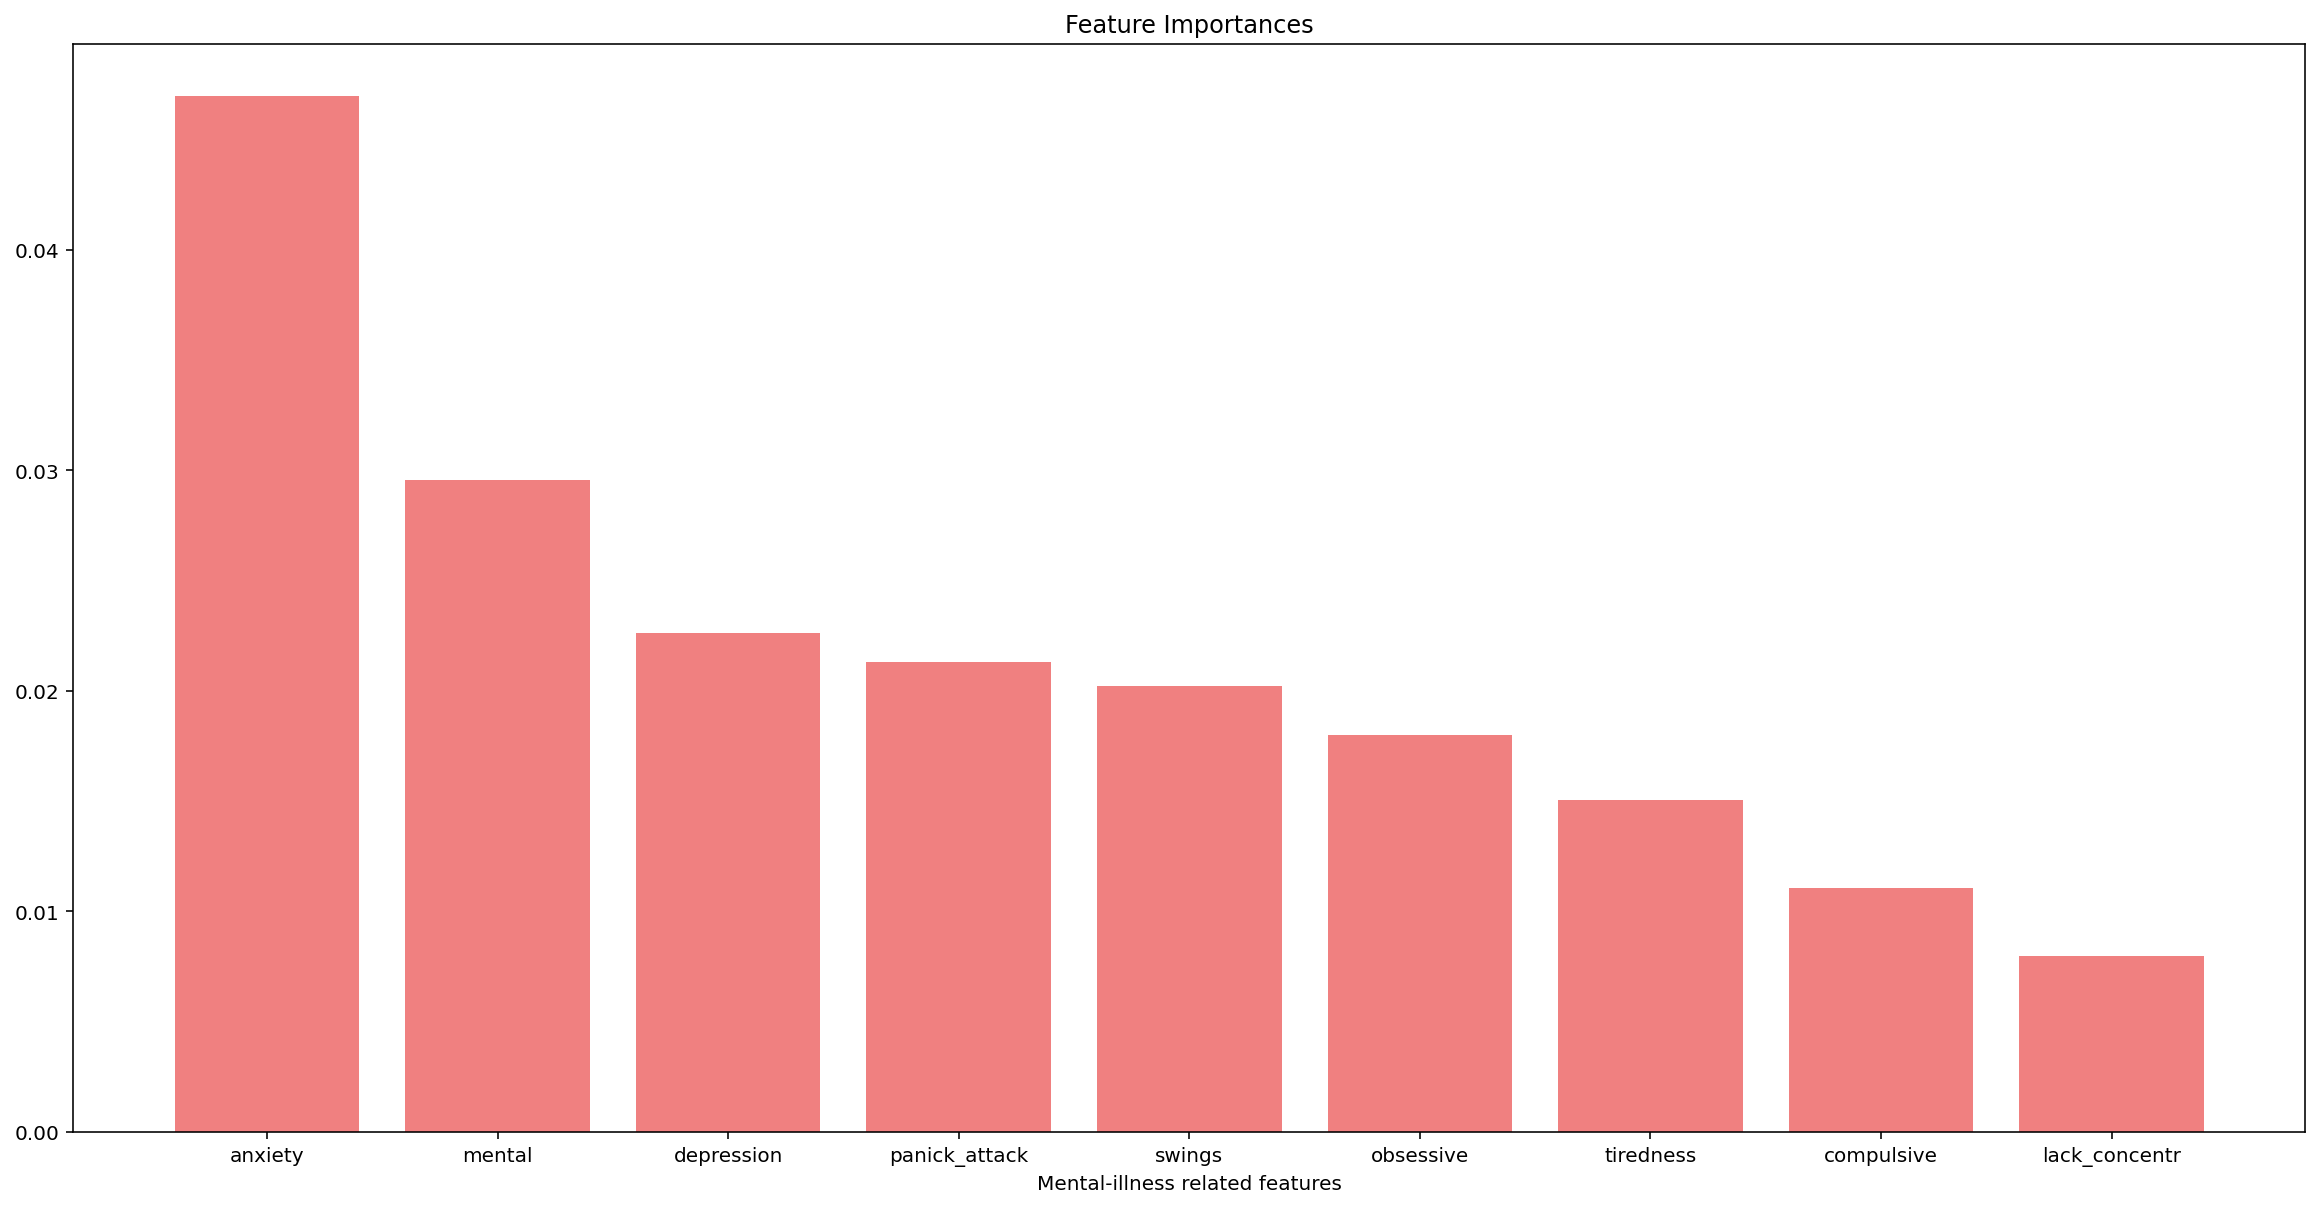

In [ ]:
fimp = pd.DataFrame({'ft' : X_test.columns, 'fimp' : m.best_estimator_.feature_importances_})
fimp = fimp.sort_values('fimp', ascending=False)
fimp = fimp[fimp.ft.isin(['mental', 'lack_concentr', 'anxiety', 'depression', 'obsessive', 'swings', 'panick_attack', 'compulsive', 'tiredness', ])]

fig, ax = plt.subplots(1, figsize=(20, 10))
ax.bar(fimp.ft, fimp.fimp, color='lightcoral')
ax.set(title='Feature Importances', xlabel='Mental-illness related features')
plt.show()

### kNN

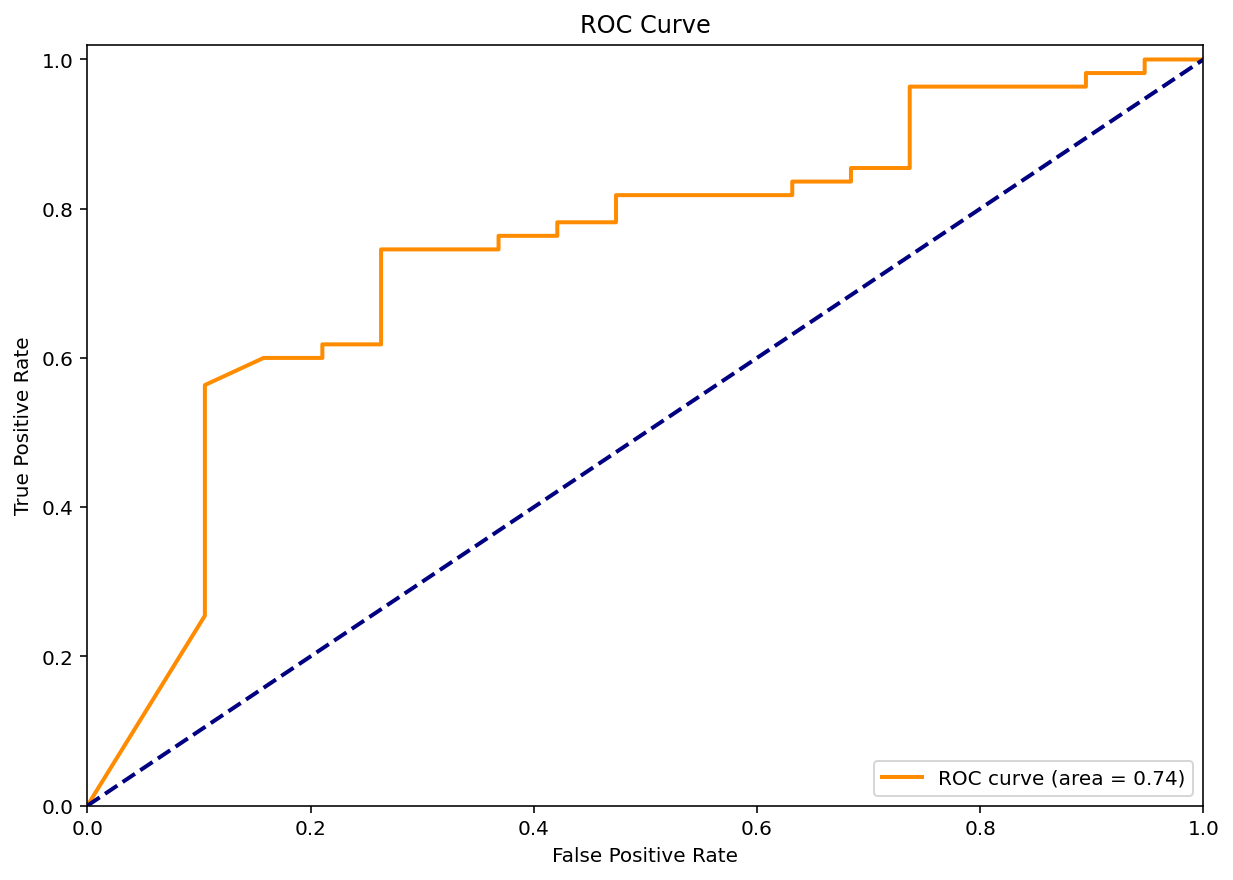

In [ ]:
params = {
    'n_neighbors': np.arange(3, 10), 
    'weights': ['distance'], 
    'p': np.arange(1, 6)
    }
m = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, scoring=scorer, cv=4)
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
y_proba = m.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
roc_auc = np.round(roc_auc, 4)
f1 = np.round(f1_score(y_test, y_pred), 4)
acc = np.round(accuracy_score(y_test, y_pred), 4)

show_roc(y_test, y_proba)

results = results.append(pd.DataFrame(
    np.array(['kNN', acc, roc_auc, f1, m.best_params_]).reshape(1, -1), columns = results.columns
    ), 
    ignore_index = True)

### SVC

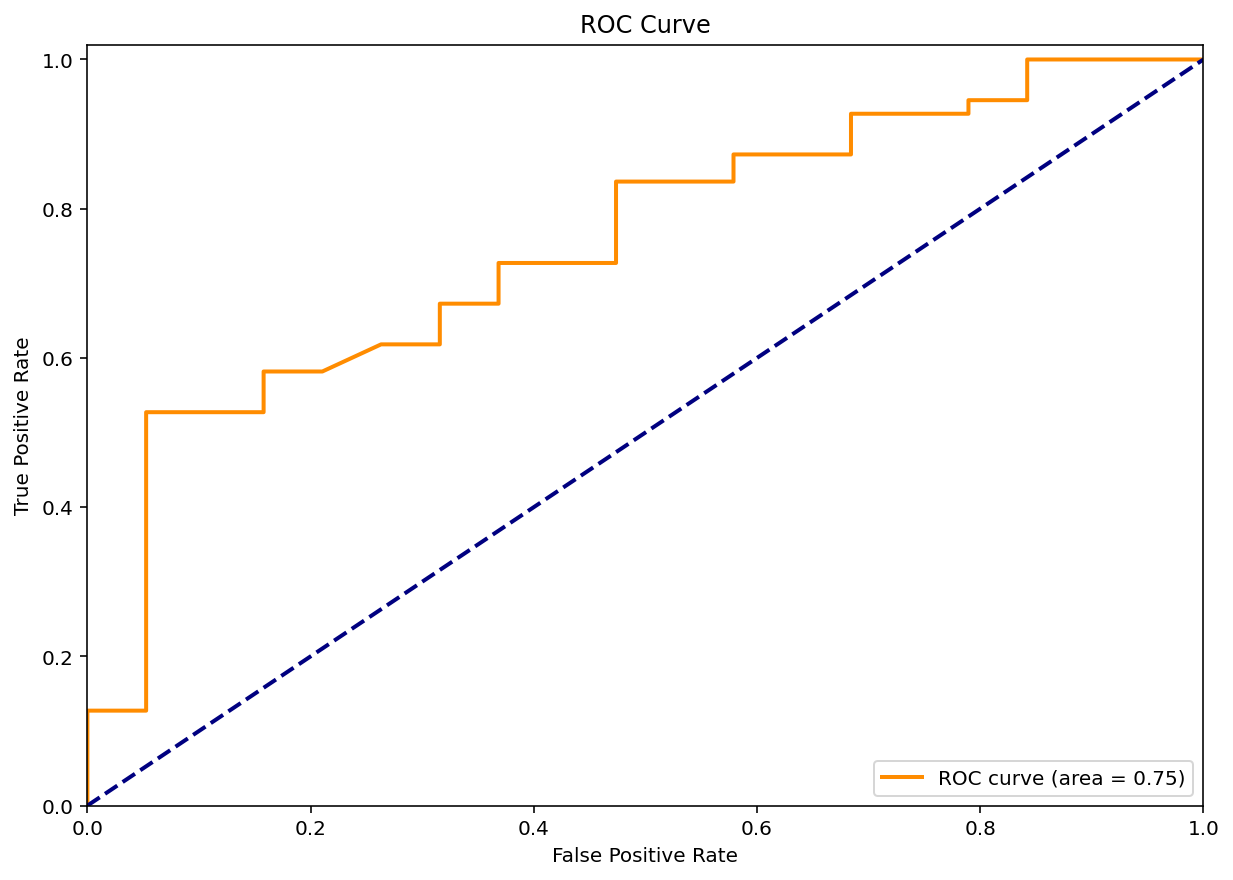

In [ ]:
params = {
    'C': np.logspace(-1, 2, 30), 
    'kernel': ['poly', 'rbf', 'linear', 'sigmoid']
    }
m = GridSearchCV(estimator=SVC(random_state = 11, probability = True), param_grid=params, scoring=scorer, cv=4)
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
y_proba = m.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
roc_auc = np.round(roc_auc, 4)
f1 = np.round(f1_score(y_test, y_pred), 4)
acc = np.round(accuracy_score(y_test, y_pred), 4)

show_roc(y_test, y_proba)

results = results.append(pd.DataFrame(
    np.array(['SVC', acc, roc_auc, f1, m.best_params_]).reshape(1, -1), columns = results.columns
    ), 
    ignore_index = True)

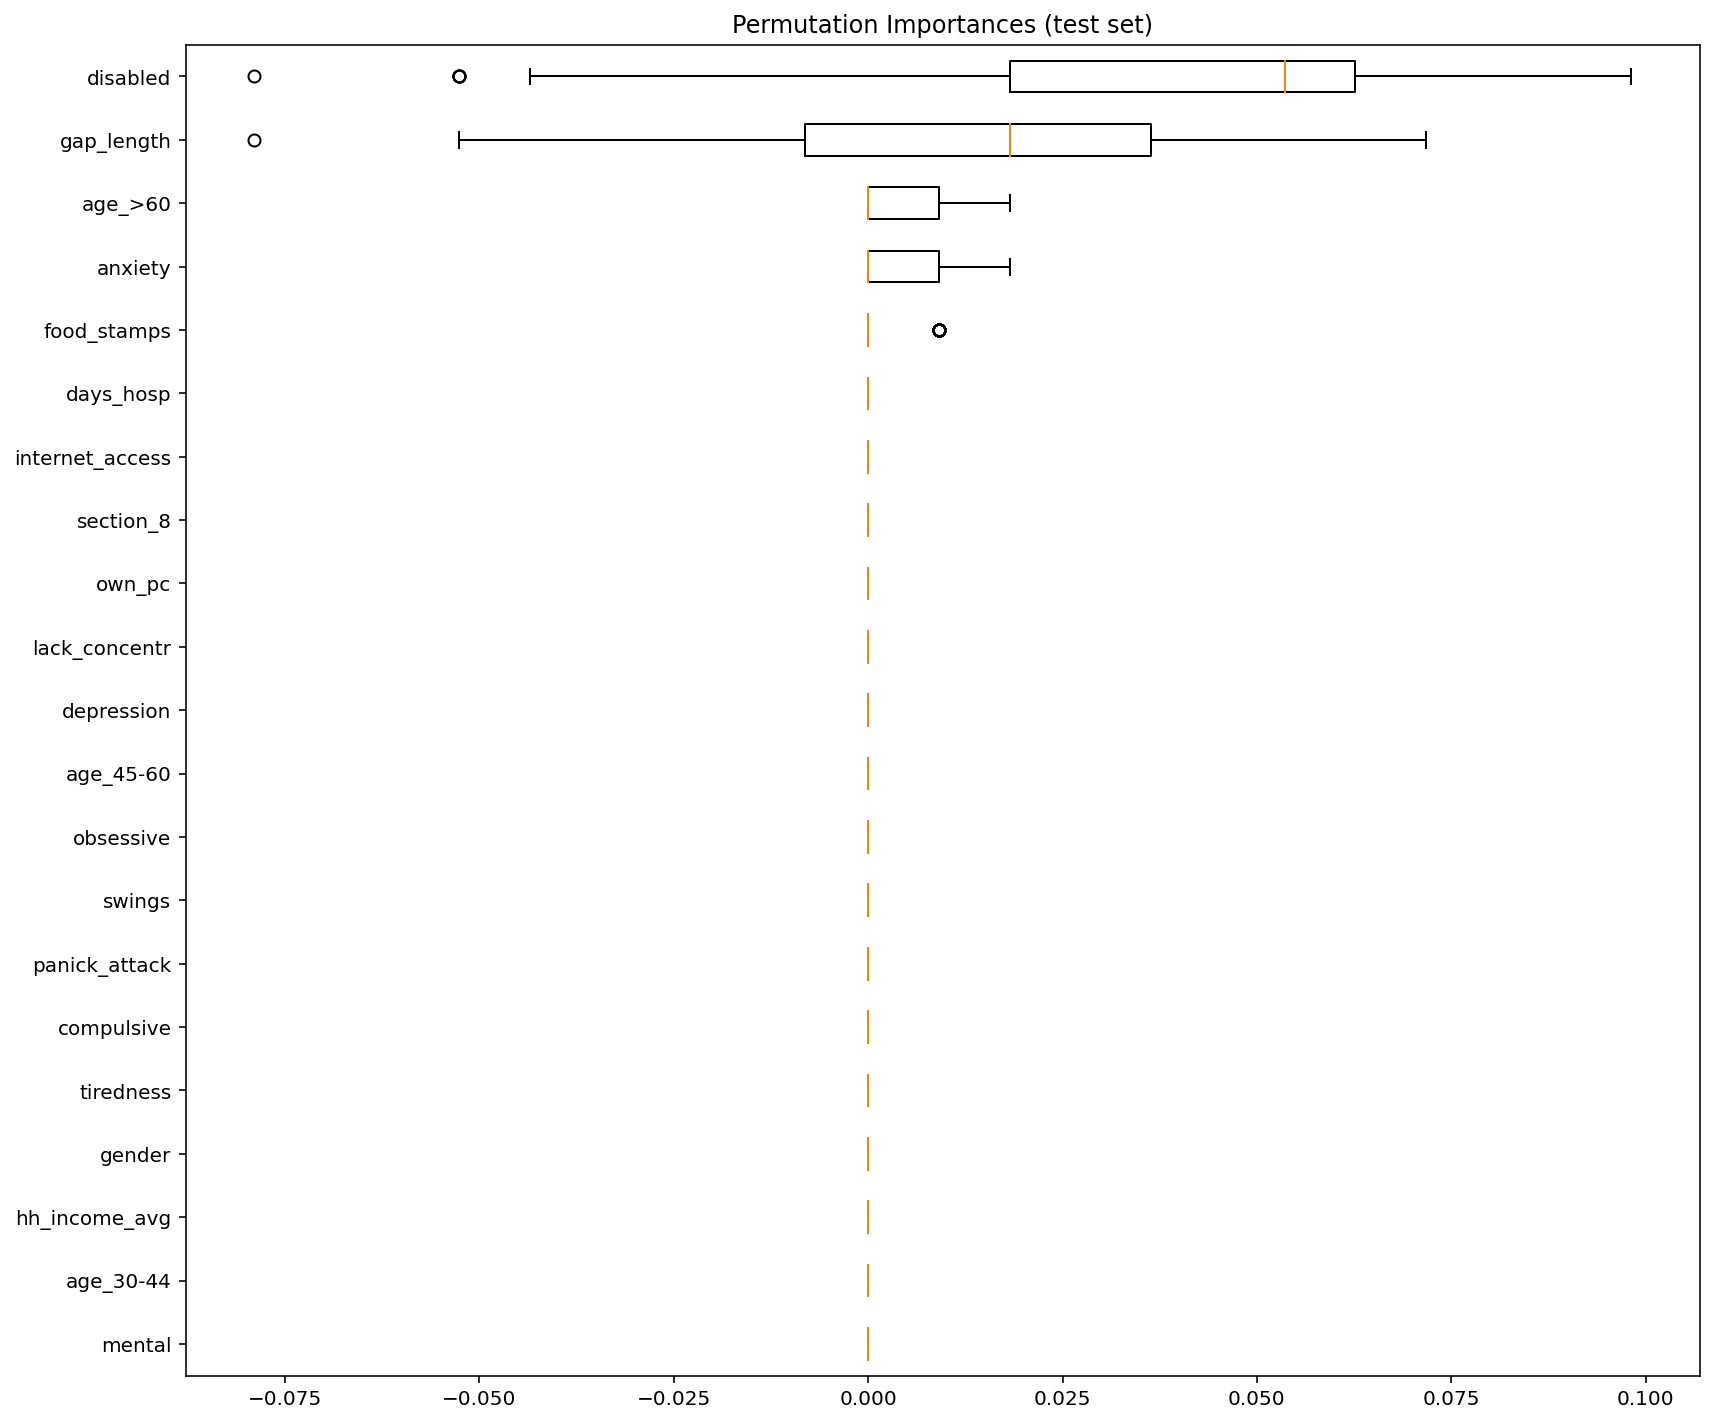

In [ ]:
result = permutation_importance(m, X_test, y_test, n_repeats=200,
                                random_state=11, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize = (12, 10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

### Naive Bayes

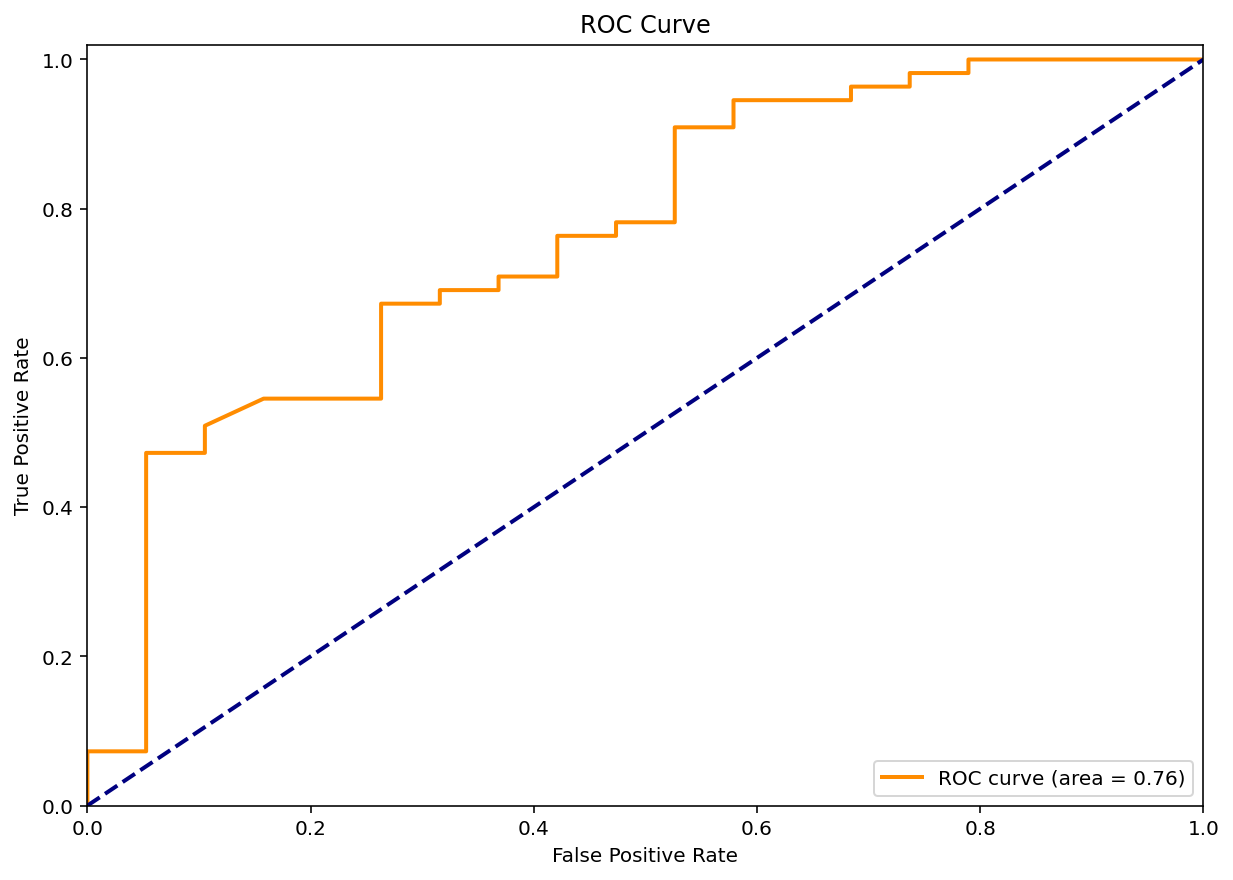

In [ ]:
m = GaussianNB()
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
y_proba = m.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
roc_auc = np.round(roc_auc, 4)
f1 = np.round(f1_score(y_test, y_pred), 4)
acc = np.round(accuracy_score(y_test, y_pred), 4)

show_roc(y_test, y_proba)

results = results.append(pd.DataFrame(
    np.array(['Naive Bayes', acc, roc_auc, f1, {}]).reshape(1, -1), columns = results.columns
    ), 
    ignore_index = True)

### CatBoost

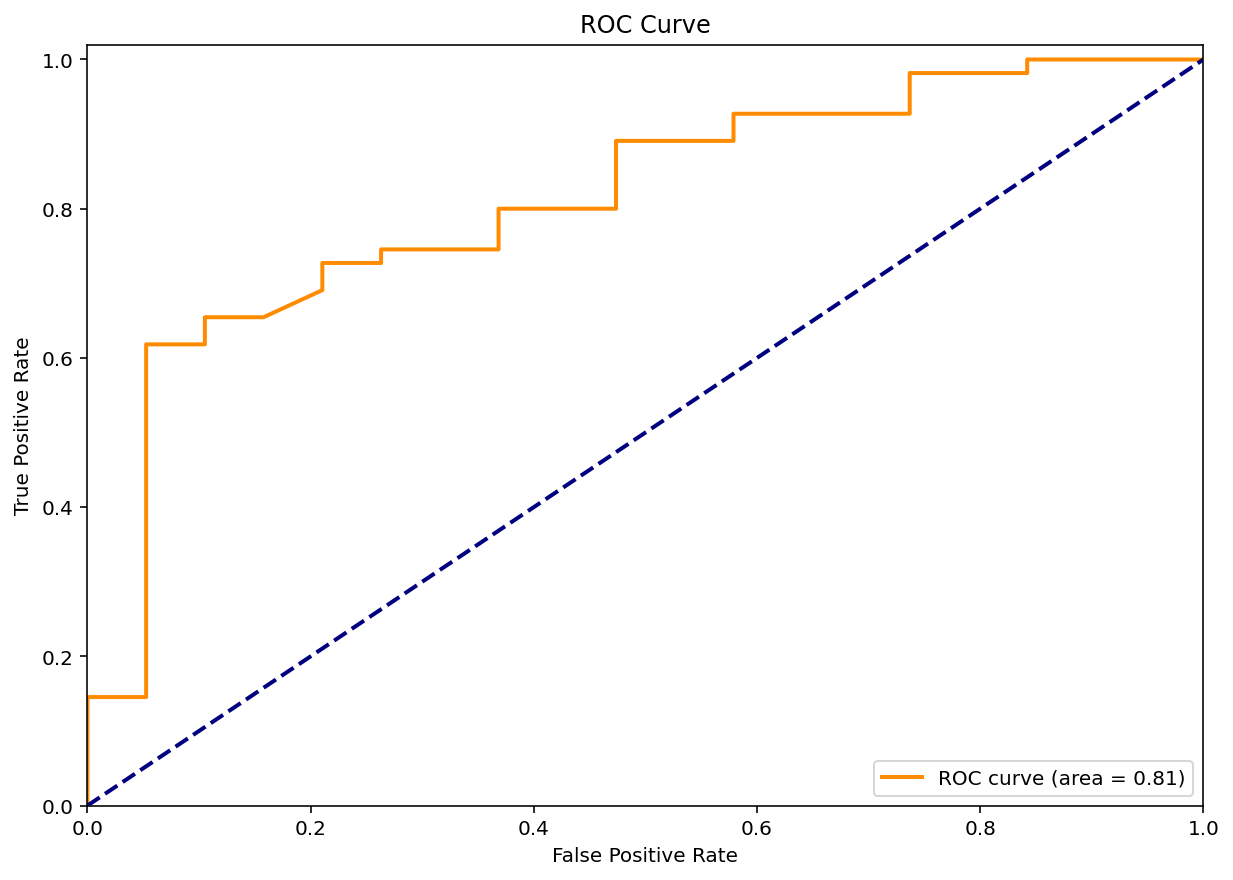

In [ ]:
params = {
    'learning_rate': np.arange(0.01, 0.06, 0.01),
    'iterations': np.arange(100, 1001, 100),
    'depth': np.arange(2, 6),
    'loss_function': ['CrossEntropy'],
    'l2_leaf_reg': [0.001, 0.005, 0.01]
    }
m = GridSearchCV(estimator=CatBoostClassifier(silent = True, random_state = 11), param_grid=params, scoring=scorer, cv=4)
m.fit(X_train, (y_train+1)/2)
y_pred = m.predict(X_test)
y_proba = m.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score((y_test+1)/2, y_proba)
roc_auc = np.round(roc_auc, 4)
f1 = np.round(f1_score((y_test+1)/2, y_pred), 4)
acc = np.round(accuracy_score((y_test+1)/2, y_pred), 4)

show_roc((y_test+1)/2, y_proba)

results = results.append(pd.DataFrame(
    np.array(['CatBoost', acc, roc_auc, f1, m.best_params_]).reshape(1, -1), columns = results.columns
    ), 
    ignore_index = True)

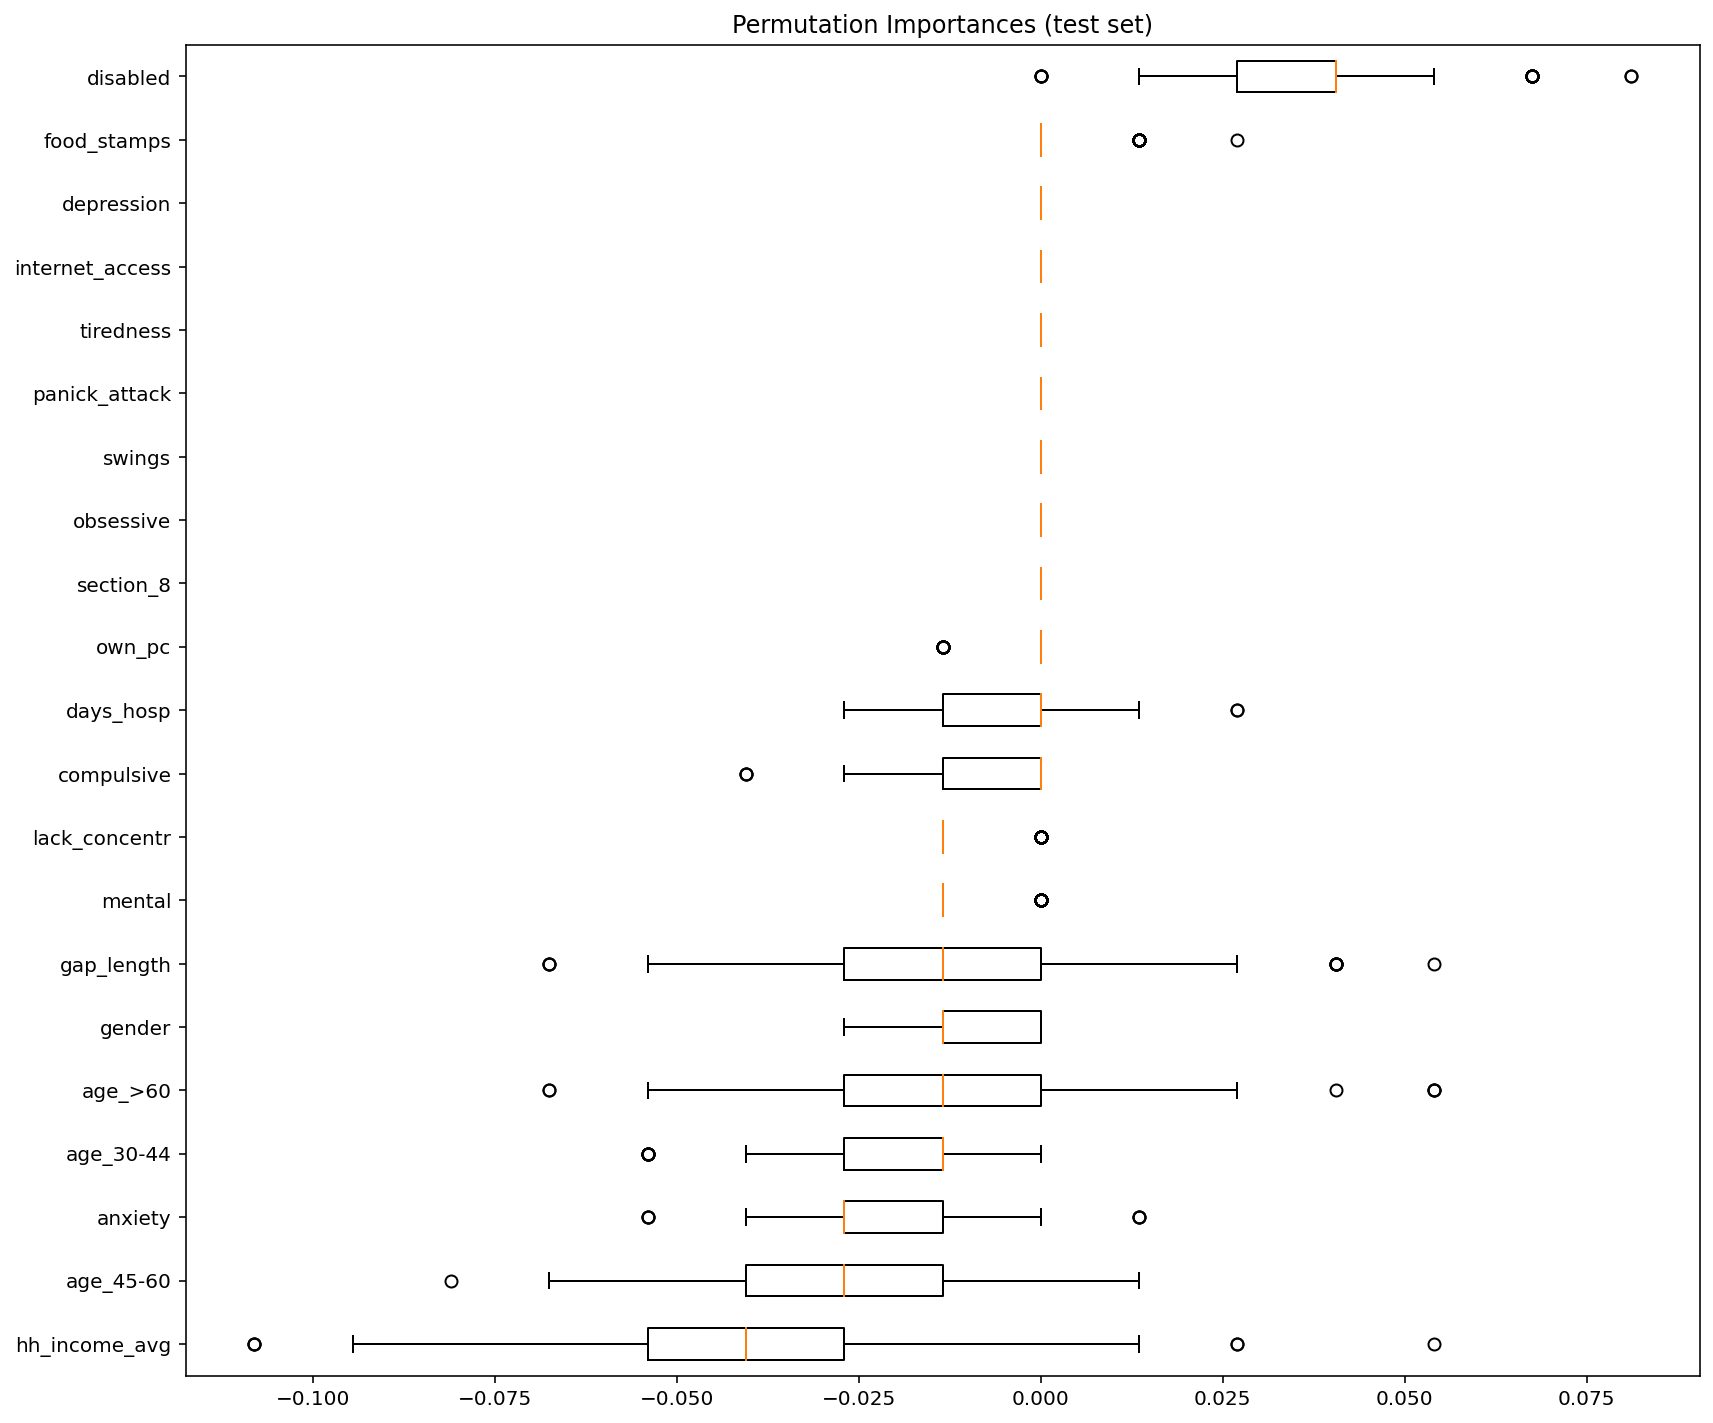

In [ ]:
result = permutation_importance(m, X_test, y_test, n_repeats=200,
                                random_state=11, n_jobs=-1, scoring='accuracy')
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize = (12, 10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

### XGBoost

In [ ]:
params = {
    'learning_rate': np.arange(0.01, 0.06, 0.01),
    'iterations': np.arange(100, 1001, 100),
    'depth': np.arange(2, 6),
    'loss_function': ['Logloss', 'CrossEntropy'],
    'l2_leaf_reg': [0.001, 0.005, 0.01]
    }
m = GridSearchCV(estimator=XGBClassifier(silent = True, random_state = 11), param_grid=params, scoring=scorer, cv=4)
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
y_proba = m.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
roc_auc = np.round(roc_auc, 4)
f1 = np.round(f1_score(y_test, y_pred), 4)
acc = np.round(accuracy_score(y_test, y_pred), 4)

show_roc(y_test, y_proba)

results = results.append(pd.DataFrame(
    np.array(['XGBoost', acc, roc_auc, f1, m.best_params_]).reshape(1, -1), columns = results.columns
    ), 
    ignore_index = True)

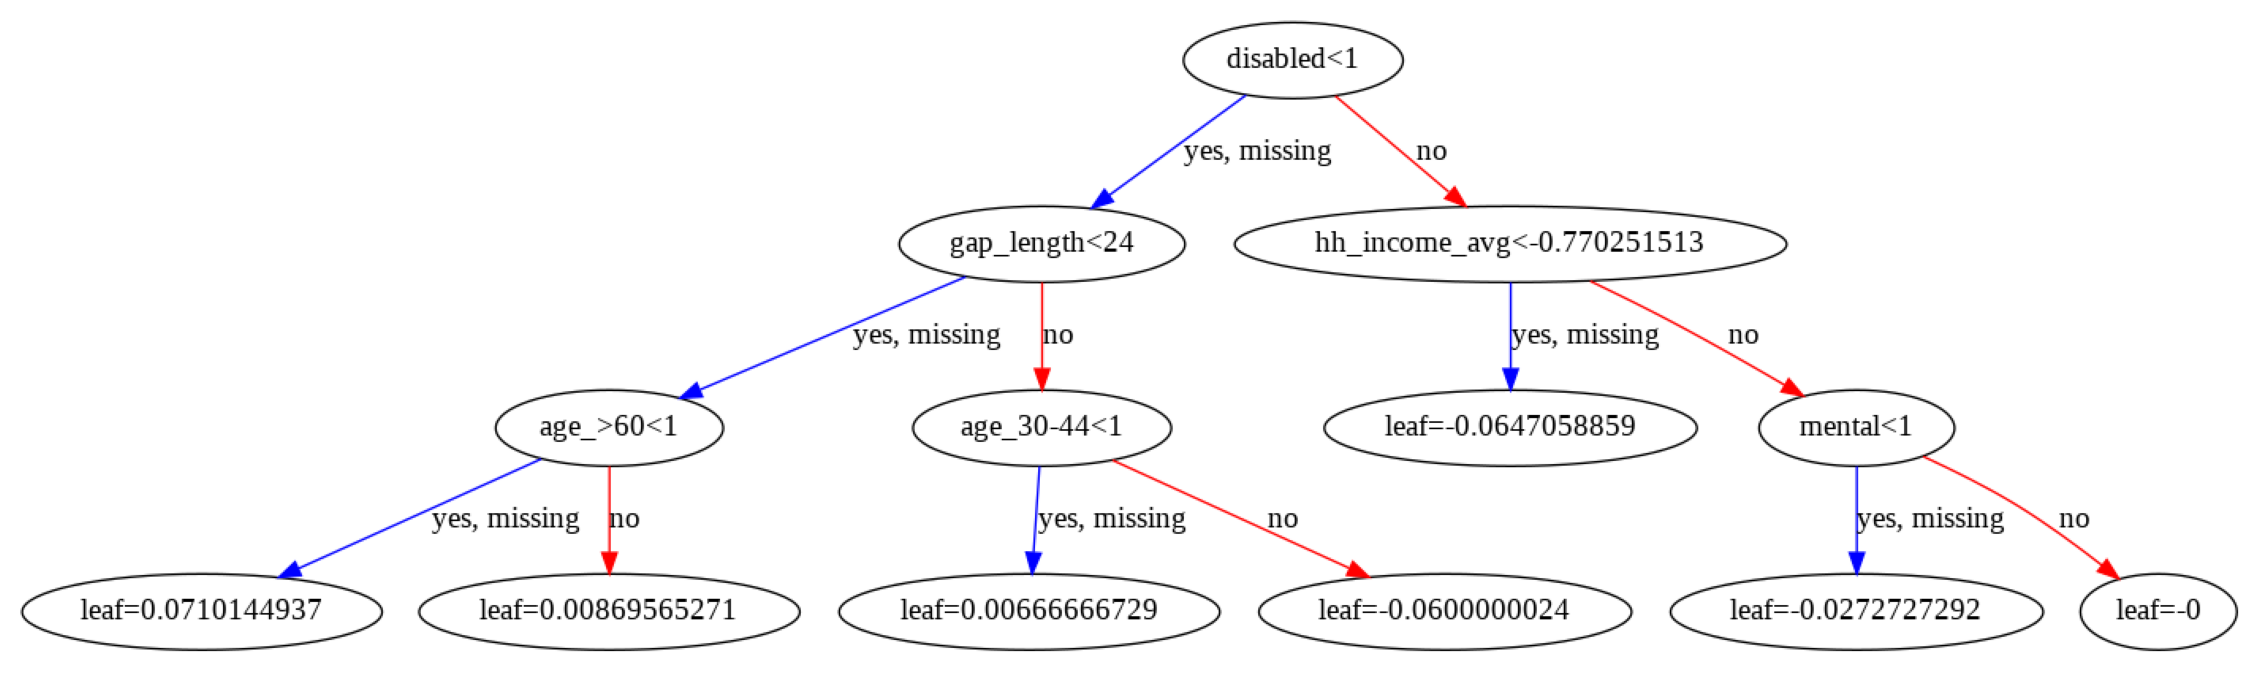

In [ ]:
from xgboost import plot_tree
xgbc = m.best_estimator_
fig, ax = plt.subplots(figsize=(20, 15))
plot_tree(xgbc, ax=ax)
plt.show()

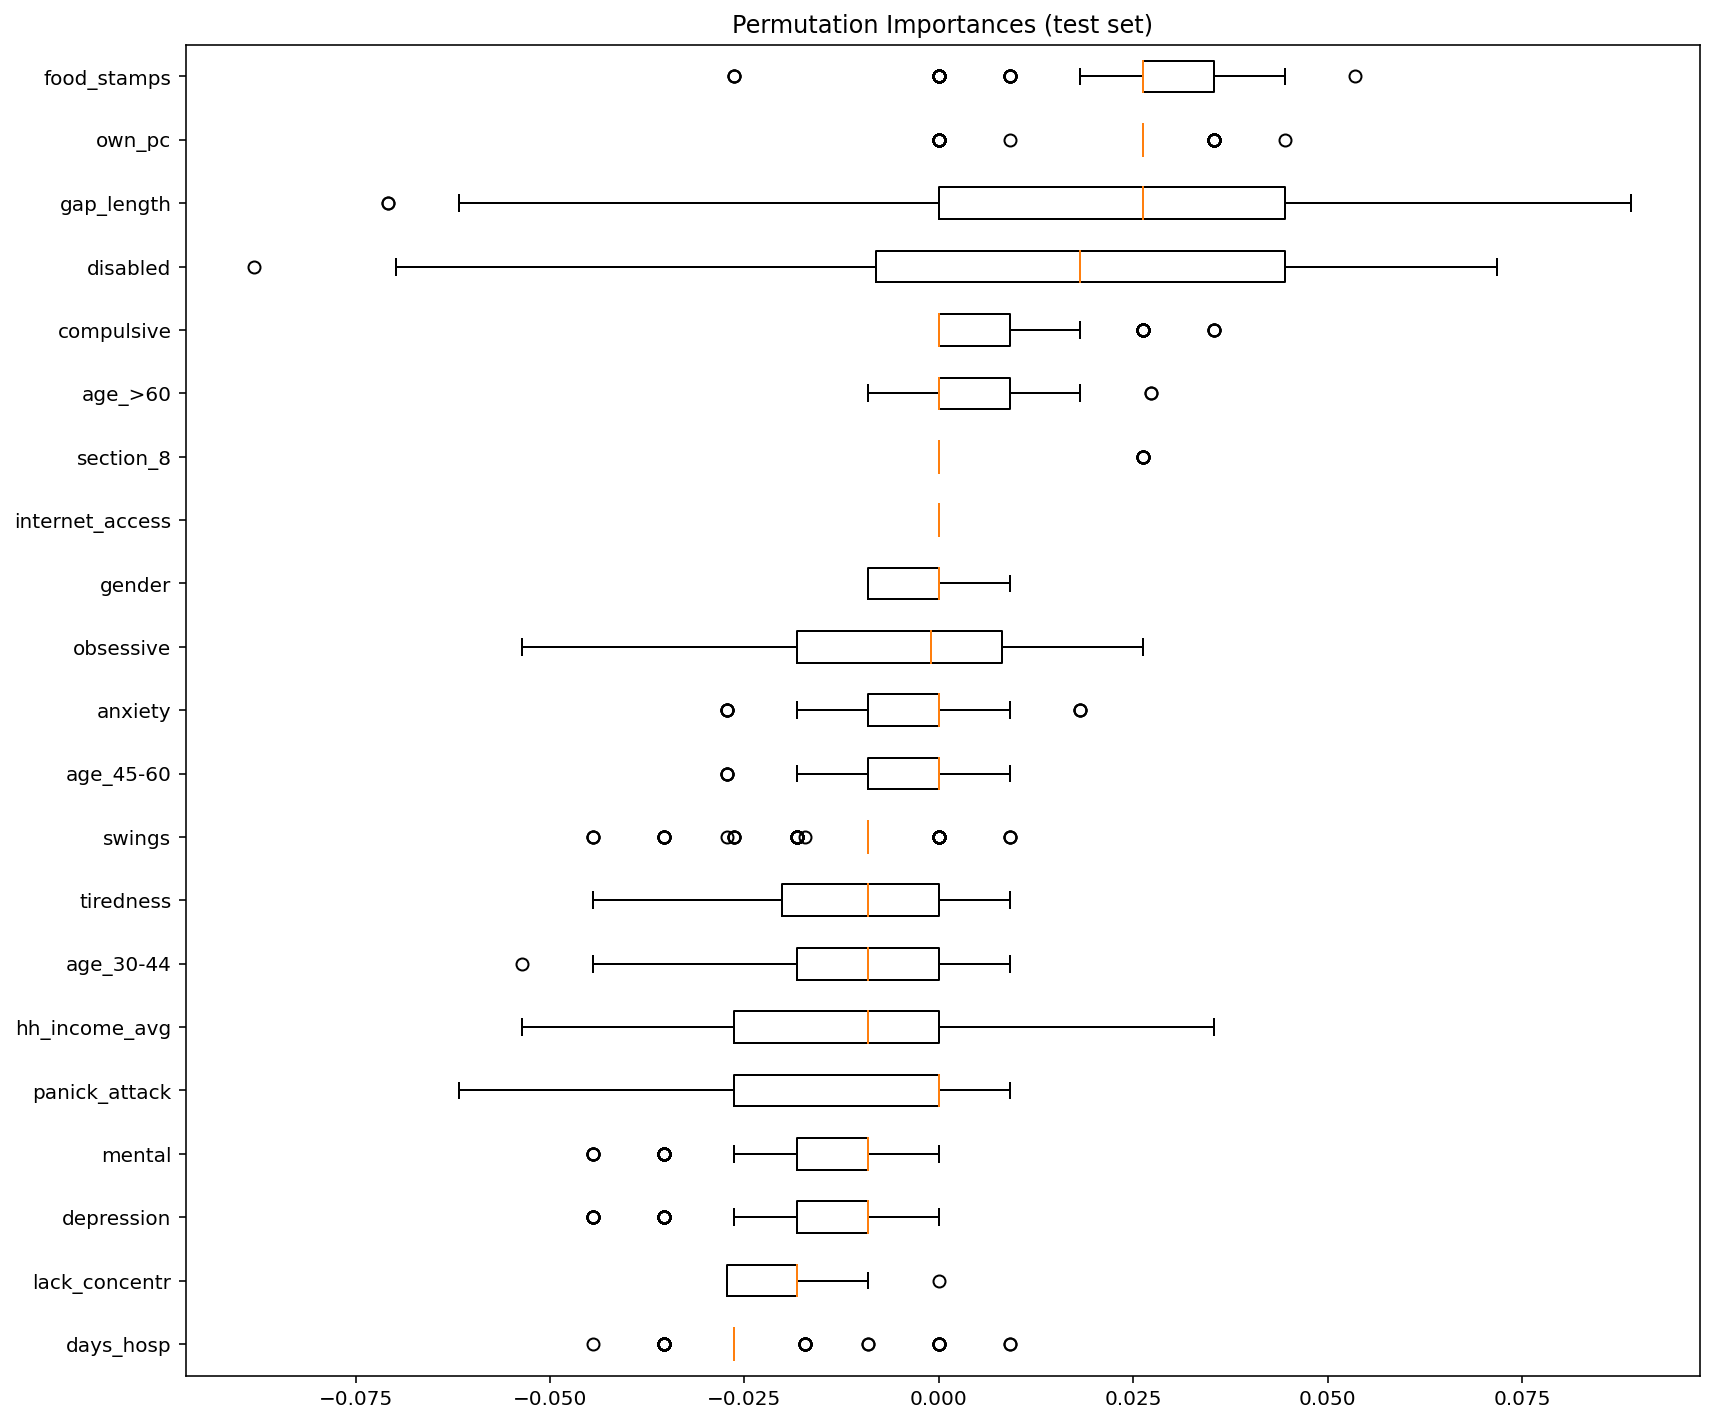

In [ ]:
result = permutation_importance(m, X_test, y_test, n_repeats=200,
                                random_state=11, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize = (12, 10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

### Linear Discriminant Analysis



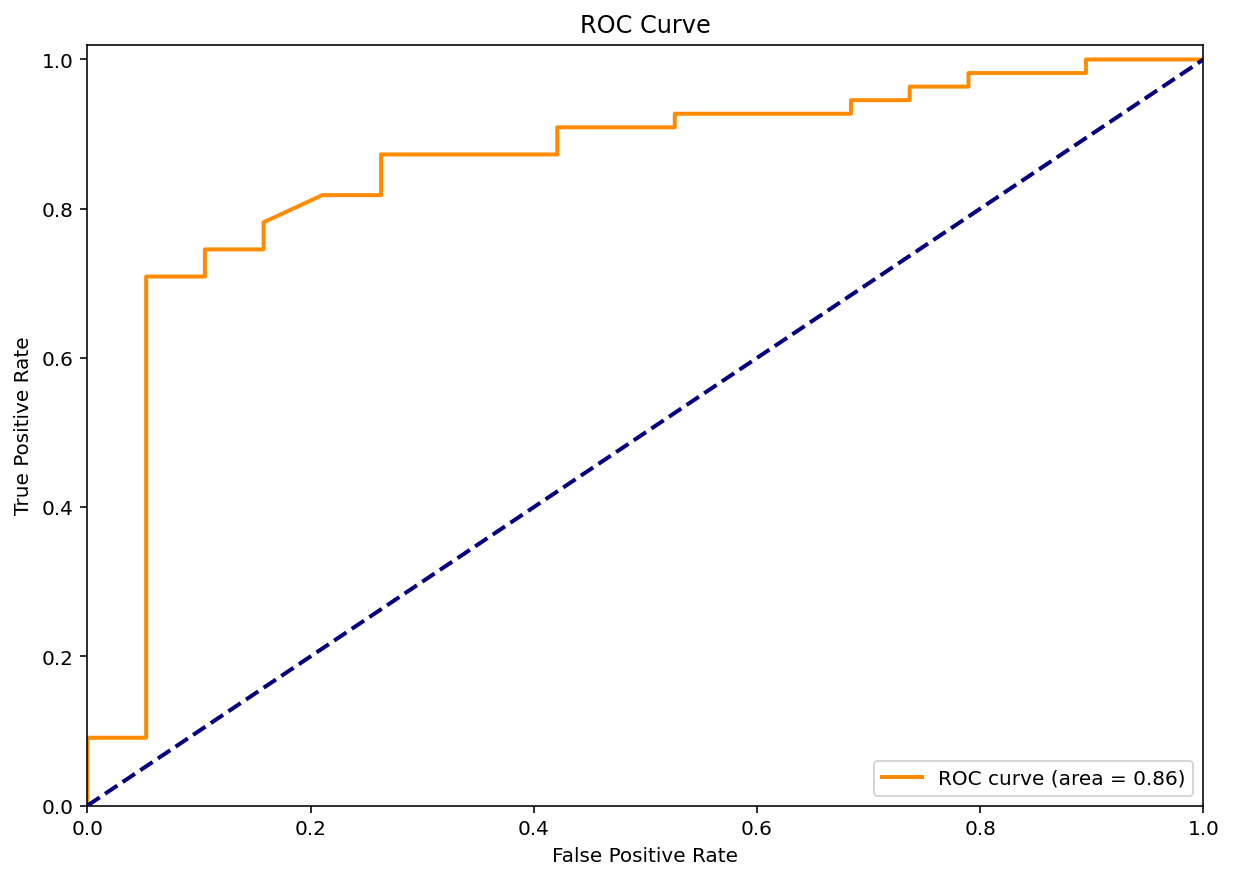

In [ ]:
params = {'solver': ['svd', 'lsqr', 'eigen']}
m = GridSearchCV(estimator=LinearDiscriminantAnalysis(shrinkage = 'auto'), param_grid=params, scoring=scorer, cv=4)
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
y_proba = m.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
roc_auc = np.round(roc_auc, 4)
f1 = np.round(f1_score(y_test, y_pred), 4)
acc = np.round(accuracy_score(y_test, y_pred), 4)

show_roc(y_test, y_proba)

results = results.append(pd.DataFrame(
    np.array(['LDA', acc, roc_auc, f1, m.best_params_]).reshape(1, -1), columns = results.columns
    ), 
    ignore_index = True)

### Quadratic Discriminant Analysis

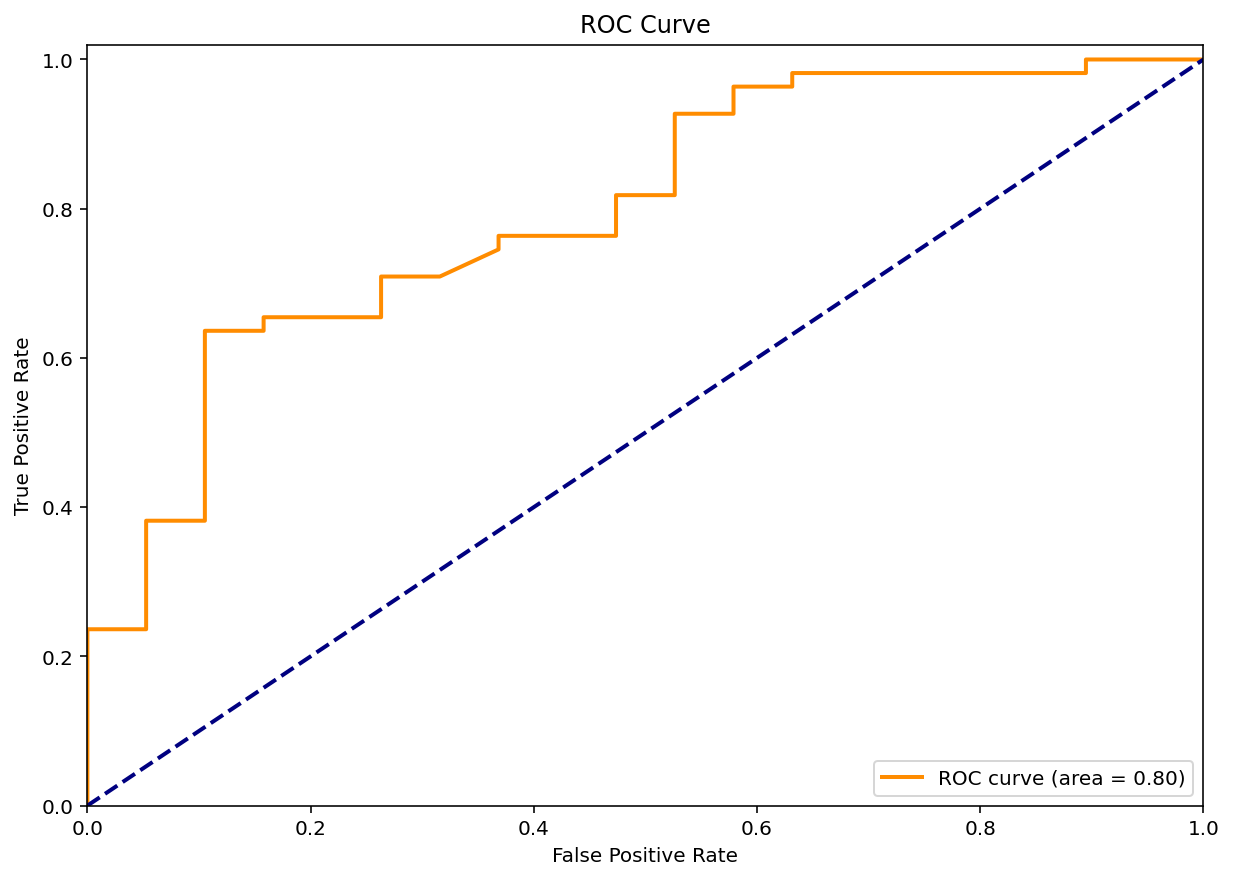

In [ ]:
params = {'reg_param': np.arange(0, 1.01, 0.02),'tol': np.logspace(-6, -2, 20)}
m = GridSearchCV(estimator=QuadraticDiscriminantAnalysis(), param_grid=params, scoring=scorer, cv=4)
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
y_proba = m.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
roc_auc = np.round(roc_auc, 4)
f1 = np.round(f1_score(y_test, y_pred), 4)
acc = np.round(accuracy_score(y_test, y_pred), 4)

show_roc(y_test, y_proba)

results = results.append(pd.DataFrame(
    np.array(['QDA', acc, roc_auc, f1, m.best_params_]).reshape(1, -1), columns = results.columns
    ), 
    ignore_index = True)

## Best Models

In [ ]:
y_test.value_counts() / y_test.shape[0]

empl
 1      0.743243
-1      0.256757
dtype: float64

In [ ]:
results.sort_values('Accuracy', ascending=False)

,Model,Accuracy,ROC-AUC score,F1-score,best params
7,LDA,0.7973,0.8555,0.8718,{'solver': 'lsqr'}
4,Naive Bayes,0.7838,0.7646,0.8596,{}
1,Random Forest,0.7703,0.8249,0.8595,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."
3,SVC,0.7703,0.7541,0.8571,"{'C': 0.8531678524172808, 'kernel': 'linear'}"
6,XGBoost,0.7703,0.7947,0.8496,"{'depth': 2, 'iterations': 100, 'l2_leaf_reg':..."
0,Logistic Regression,0.7432,0.6995,0.843,"{'C': 10.0, 'l1_ratio': 0.0}"
8,QDA,0.7432,0.7971,0.8288,"{'reg_param': 0.02, 'tol': 1e-06}"
5,CatBoost,0.7297,0.8124,0.8148,"{'depth': 2, 'iterations': 800, 'l2_leaf_reg':..."
2,kNN,0.7027,0.7426,0.807,"{'n_neighbors': 8, 'p': 2, 'weights': 'distance'}"


Best models are LDA, Naive Bayes and Random Forest.

In previous iteration Random Forest was better, when we've built slides.

As you can see from table best model is Random Forest, because it is demostrated the best classification metrics and can predict more accurate than other models.

In [ ]:
results.iloc[1]

Model                                                Random Forest
Accuracy                                                    0.7703
ROC-AUC score                                               0.8249
F1-score                                                    0.8595
best params      {'criterion': 'entropy', 'max_depth': 4, 'max_...
Name: 1, dtype: object

In [ ]:
results.iloc[1]['best params']

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 100}

## Econometrics

# 5. Results and Interpretation

In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                   empl   No. Observations:                  222
Model:                          Logit   Df Residuals:                      201
Method:                           MLE   Df Model:                           20
Date:                Mon, 18 Oct 2021   Pseudo R-squ.:                  0.2682
Time:                        13:43:07   Log-Likelihood:                -101.82
converged:                       True   LL-Null:                       -139.13
Covariance Type:            nonrobust   LLR p-value:                 3.129e-08
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
mental              0.2815      0.620      0.454      0.650      -0.933       1.496
disabled           -2.3681      0.690     -3.432      0.001      -3.721      -1.016
gap_length         -0.0366      

* The length of employment gap significantly and negatively affects to employment

* Disabled persons have more probability to be unemployed

* Most of mental illnesses are not significant (or anxiety is significant but works in an opposite way) 

* We assume that absence of significance and weird effects can be caused by endogeneity and sample bias.


Therefore, hypothesis about significance of mental health problems to unemployment is not approved, while the length of resume gap is really significant to being unemployed.

**Summary:**

* We use different methods to data preprocessing (kNN Imputer, One-Hot Encoding, Normalization)

* Analyze descriptive statistics of data and different relations in box-plots, histograms and scatter plots

* Build ML methods to investigate research question and make carefully prediction of unemployment (Random Forest, XGBoost, LDA,CatBoost, Logit, kNN, SVC and others)

* Estimate metrics of classification and choose best model (Random Forest) with more than 77% accuracy. 

* Check the importance of mental health problems features to unemployment and find that they are insignificant.

* But employment gap is indeed significant.
